
## 2. Variables Aleatorias



 Una variable aleatoria es una transformación $X$ del espacio de resultados $\Omega$ al conjunto de números reales, esto es,
$
X : \Omega \rightarrow \mathbb{R},
$
tal que para cualquier número real $x$,
$
\{\omega \in \Omega : X(\omega) \leq x\} \in \mathcal{F}.$ (Rincón, 2014).

Considerando el conjunto de valores que una variable aleatoria puede tomar, vamos a clasificar a las variables aleatorias en dos tipos: discretas o continuas.



# ----------------------------------------
## 2.1 Variables aleatorias discretas
# -----------------------------------------

Se dice que una variable aleatoria $Y$ es discreta si puede tomar sólo un número finito o contablemente infinito de valores distintos.(Mendenhall, 2009)

In [ ]:
import numpy as np # Importamos Numpy
import numpy.random as npr # para generar numeros aleatorios

import scipy.stats as sps # Importamos el modulo SciPy
from scipy.stats import randint # para trabajar una uniforme discreta en un rango de enteros

import matplotlib.pyplot as plt #Visualizar datos

import random # para generar numeros aleatorios

## Variable aleatoria uniforme discreta

Una variable aleatoria $X$ tiene distribución uniforme discreta en el conjunto $\{x_1,...,x_n\}$ si su función de densidad está dada por
$$ f_X(x) = \mathbb{P}(X=x) = \begin{cases} \frac{1}{n}, \quad \text{si } x\in \{x_1,...,x_n\} \\
0, \quad \text{e.o.c} \end{cases}$$

Se llama uniforme porque cada uno de sus posibles resultados de $X$ tienene la misma probabilidad.

**Notación:** $X\sim Unif(x_1,...,x_n)$

La esperanza y varianza de $X$, están dadas por:

$$ \mathbb{E}[X] = \sum_{x} xf_X(x) = \frac{x_n + x_1}{2} $$
y
$$ \text{Var}(X) = \mathbb{E}\left[ (X-\mathbb{E}[X])^2\right] = \frac{(x_n - x_1 + 1)^2 -1}{12}$$

$\color{red}{\text{Ejercicio 1.}}$ Verifica que, en efecto, la esperanza y varianza de una variable aleatoria uniforme.

La función de distribución de una v.a. uniforme es:
$$ F_X(x) = \mathbb{P}(X\le x) = \begin{cases} 0, \quad \text{si } x < x_1 \\ \frac{x}{n}, \quad \text{si } x\in \{x_1,...,x_n\} \\
1, \quad \text{si } x > x_n \end{cases}$$

$\color{red}{\text{Solución}}$

$$ \mathbb{E}[X] = \sum_{x} xf_X(x) =\frac{(x_1+x_n)}{2}$$

$$ \text{Var}(X) = \mathbb{E}\left[ (X-\mathbb{E}[X])^2\right] = $$

$$\mathbb{E}[X^2]=\sum_{i=1}^n x_i^2  \frac{1}{n}=\frac{1}{n}*\frac{n(x_n+x_1)(2x_n+x_1)}{6}=\frac{(2x_n^2+3x_n+x_1)}{6}$$

$$Var(x)=\frac{(2x_n^2+3x_n+x_1)}{6}-{\frac{(x_1+x_n)}{2}}^2= \frac{(x_n - x_1 + 1)^2 -1}{12}$$

**Ejemplo** Se lleva a cabo una rifa donde los boletos están enumerados del $00$ al $99$. Si $Y$ es la variable aleatoria definida como el número del boleto ganador, entonces:  
$$\mathbb{P}(Y=k)=\begin{cases}
	\frac{1}{100} &\quad \text{si } k=00,01,\dots,99 \\
	0 &\quad \text{en otro caso}
\end{cases}$$
Consideremos que el premio de la rifa se determina a partir del número premiado de la siguiente forma: $X=Y+1$, donde $X$ es el monto del premio en pesos y $Y$ es el número premiado, entonces $X$ es una variable aleatoria, pues es una función de $Y$, y además se tiene
	$$f_{X}(k)=\begin{cases}
		\frac{1}{100} &\quad \text{si } x=1,2,\dots,100 \\
		0 &\quad \text{en otro caso}
	\end{cases}$$

$\color{red}{\text{Ejercicio 2.}}$ Calcular la esperanza y varianza.    

Supongamos que nos interesa calcular la probabilidad de que el premio sea mayor a $\$80$, entonces
$$ \mathbb{P}(X>80) = \sum_{k=81}^{100} \frac{1}{100} = \frac{20}{100} = 0.2 $$

$\color{red}{\text{Solución}}$ 

$$E[X]=\frac{(a+b)}{2}=\frac{(1+100)}{2}=\frac{(101)}{2}$$
$$Var(X)=\frac{(b-a)^{2}}{12}=\frac{(100-1)^{2}}{12}=\frac{(99)^{2}}{12}$$

Para más información, ver [Matplotlib colores](https://matplotlib.org/stable/gallery/color/named_colors.html)

### Gráfica de la distribución Uniforme Discreta

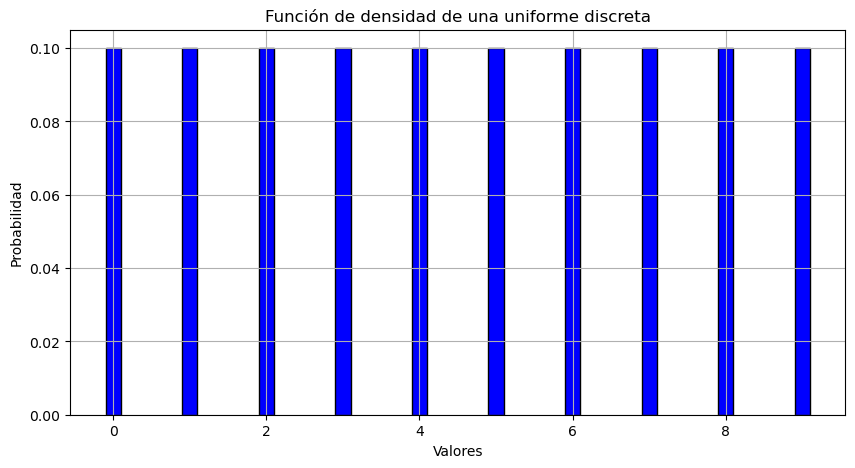

In [ ]:
# Definir el rango de la distribución uniforme discreta [low, high)
low = 0 #límite inferior
high = 10 #límite superior

#Crear los valores posibles dentro del rango
x = np.arange(low, high)

#Calcular la función de masa de probabilidad
pmf = np.full_like(x, 1/ (high-low) , dtype = float )

#Para crear una figura más grande
plt.figure(figsize=(10, 5))

#Graficar pmf
plt.bar(x, pmf, width=0.2, color='b', edgecolor='black')
plt.xlabel('Valores')
plt.ylabel('Probabilidad')
plt.title('Función de densidad de una uniforme discreta')
plt.grid(True)
plt.show() #mostrar el gráfica


## Variable aleatoria Bernoulli con parámetro $p\in (0,1)$

Este modelo se aplica a un experiemento cuyo espacio muestral tiene dos resultados
$$ \Omega = \{\text{éxito} , \text{fracaso}\}$$
y definimos
- $X(\{\text{éxito}\}) =1$
- $X(\{\text{fracaso}\}) =0$

Las probabilidades asociadas a este modelo son
- $\mathbb{P}(\{\text{éxito}\}) = p$
- $\mathbb{P}(\{\text{fracaso}\}) = 1-p$
donde $0<p<1$.

La función de densidad, está definida de la siguiente manera
$$ f_X(x) = \mathbb{P}(X=x) = \begin{cases} p^x(1-p)^{1-x}, \quad \text{si } x\in \{0,1\} \\
0, \quad \text{e.o.c} \end{cases}$$

**Notación:** $X\sim Ber(p)$

Mediante la combinación de v.a. Bernoulli es posible construir otras v.a.

La esperanza y varianza de $X\sim Ber(p)$, esá dada por:

$$ \mathbb{E}[X] =\sum_{x=0}^{1} x f_{X}(x) = 0\cdot (1-p) + 1 \cdot p = p $$
y
$$ \mathbb{E}[X^2] =\sum_{x=0}^{1} x^2 f_{X}(x) = 0^2 \cdot (1-p) + 1^2 \cdot p = p $$
entonces
$$ \text{Var}(X) = \mathbb{E}[X^2] - (\mathbb{E}[X])^2  = p - p^2 = p(1-p)$$

Para más información, ver [Bernoulli](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bernoulli.html)

### Gráfica de la distribución Bernoulli

La función de densidad =  [0.7 0.3]


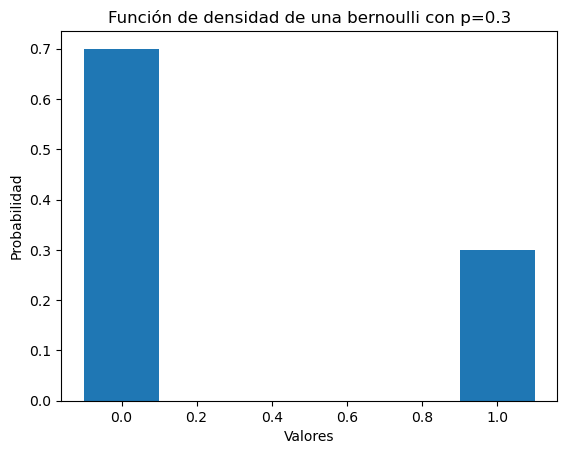

La esperanza es =  0.3
La varianza es =  0.21


In [ ]:
from scipy.stats import bernoulli

#Definimos nuestra probabilidad de éxito
p=0.3

#Defino los posibles valores
x=[0,1]

#Calculamos la función de densidad
pmf = bernoulli.pmf(x, p)

print("La función de densidad = ", pmf)

#Graficamos la función de densidad
plt.bar(x,pmf,width=0.2)
plt.xlabel('Valores')
plt.ylabel('Probabilidad')
plt.title('Función de densidad de una bernoulli con p=0.3')
#plt.grid(True)
plt.show() #mostrar el gráfica

#Calculo de la esperanza
print("La esperanza es = ", bernoulli.mean(p))

#Calculo de la varianza
print("La varianza es = ", bernoulli.var(p))

## Variable aleatoria Binomial con parámetros $n$ y $p\in(0,1)$

Decimos que una v.a. $X$ tiene distribución binomial con parámetros $n$ y $p$, si su función de densidad está dada por
$$ f_X(x) = \mathbb{P}(X=x) = \begin{cases} \binom{n}{x}p^x (1-p)^{n-x}, \quad \text{si } x\in \{0,1,...,n\} \\
0, \quad \text{e.o.c} \end{cases}$$
donde $n\in\mathbb{Z}_{+}$ y $0<p<1$.

**Obs:** Los ensayos deben ser independientes.

La esperanza de $X$ es
$$\begin{align*}
\mathbb{E}[X]=np.
\end{align*}$$
y
$$ \begin{align*}
\mathbb{E}[X^2]&= (np)^2 +np(1-p),
\end{align*} $$

Por lo que la varianza de $X$ es
$$\text{Var}(X) = np(1-p) $$

**Ejemplo** Una moneda justa se tira seis veces, donde la probabilidad de obtener sol es de $0.3$. Sea $X$ el número de veces que cae sol, entonces dabemos que $X$ tiene una distribución binomial con parámetros $n=6$ y $p=0.3$. Calcular:

- $\mathbb{P}(X=2) = \binom{6}{2}(0.3)^2 (1-p)^{6-2} = 0.3241$
- $\mathbb{P}(X=3) = \binom{6}{3}(0.3)^3 (1-p)^{6-3} = 0.1852$
- $$ \begin{align*} \mathbb{P}(1<X \le 5) &= \mathbb{P}(X=2) + \mathbb{P}(X=3) \mathbb{P}(X=4) + \mathbb{P}(X=5) \\
    &= 0.3241 + 0.1852 + \binom{6}{4}(0.3)^4 (1-p)^{6-4} + \binom{6}{5}(0.3)^5 (1-p)^{6-5}  \\
    &= 0.579 \end{align*} $$

Para más información, ver [Binomial](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html)

Notemos que $\mathbb{P}(1<X\le 5) = F_X(5) - F_X(1) $

Usamos el atributo `.cdf ` para calcular estas probabilidades

In [ ]:
from scipy.stats import binom
binom.cdf(5,6,0.3) # calcula la probabilidad acumulada de que haya 5 o menos éxitos en 6 ensayos
binom.cdf(1,6,0.3) # calcula la probabilidad acumulada de que haya 1 o menos éxitos en 6 ensayos
binom.cdf(5,6,0.3)-binom.cdf(1,6,0.3) # calcula la probabilidad deseada

0.5790960000000003

### Gráfica de la distribución Binomial

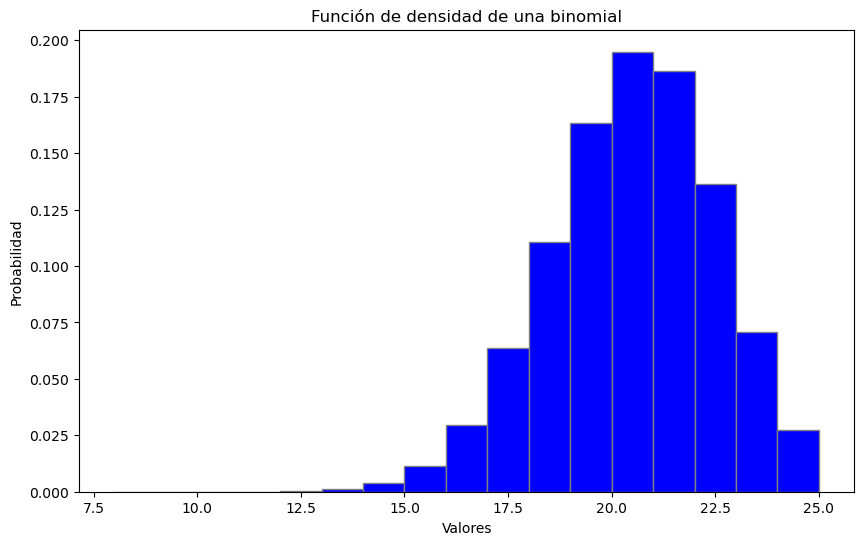

In [ ]:
n = 25 # número de ensayos bernoulli
p = 0.8 # probabilidad de éxito
s= 100000 # número de muestras

#Vamos a generar numeros aleatorios que siguen una distribución binomial
binom_numeros = sps.binom.rvs(n,p,size=s)

#Creamos un histograma
plt.figure(figsize=(10,6))
plt.hist(
    binom_numeros,
    density=True, # Normaliza el area para que sea 1
    bins=len(np.unique(binom_numeros)), # número de barras del histograma
    color = "blue",
    edgecolor="grey"
)

plt.xlabel('Valores')
plt.ylabel('Probabilidad')
plt.title('Función de densidad de una binomial')
#plt.grid(True)
plt.show() #mostrar el gráfica

## Variable aleatoria Poisson

Es una distribución de probabilidad discreta que sirve para calcular la probabilidad de que ocurra un determinado número de eventos raros durante un intervalo dado (puede ser tiempo, lingitud, área, etc).

Esta v.a. tomavalores sobre el conjunto $\{0,1,2,...\}$ y tiene un parámetro $\lambda>0$, el cual representa el número de veces que se **espera** que ocurra un evento durante un intervalo dado.

Su función de densidad, está dado como sigue:
$$ f_X(x) = \mathbb{P}(X=x) = \begin{cases} e^{-\lambda}\frac{\lambda^x}{x!}, \quad \text{si } x\in \{0,1,...\} \\
0, \quad \text{e.o.c} \end{cases}$$

Notemos que $\mathbb{E}[X]=\lambda$ y que $\text{Var}(X)=\lambda$.

**Ejemplo** Supongamos que el número de accidentes que ocurre en un punto en un día tiene distribución Poisson con parámetro $\lambda=2$,

- ¿cuál es la probabilidad de que en un día ocurran más de dos accidentes?
  $$ \begin{align*} \mathbb{P}(X>2) &= 1- \mathbb{P}(X\le 2) \\
    &= 1- [\mathbb{P}(X=0) + \mathbb{P}(X=1) + \mathbb{P}(X=2)] \\
    &= 1- \left[ e^{-2}\frac{2^0}{0!} + e^{-2}\frac{2^1}{1!} + e^{-2}\frac{2^2}{2!} \right] \\
    &= 1 - e^{-2}[1+2+2] = 1-5e^{-2} = 0.3233
    \end{align*} $$
- ¿cuál es la probabilidad de que ocurran más de dos accidentes sabiendo que por lo menos ocurre uno?
  $$ \begin{align*} \mathbb{P}(X>2 \mid X \ge 1) &= \frac{\mathbb{P}(\{X>2\} \cap \{X \ge 1\} )}{\mathbb{P}\{X \ge 1)\}} \\
       &= \frac{\mathbb{P}(\{X>2\})}{\mathbb{P}\{X \ge 1)\}} \\
       & = \frac{.3233}{1-\mathbb{P}(X<1)} = \frac{0.3233}{1-e^{-2}} \frac{0.3233}{.8646} = 0.3739
       \end{align*} $$

$\color{red}{\text{Ejercicio 3.}}$ Usando el atributo `.cdf` [Poisson](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html) calcula las probabilidades anteriores.

Supongamos que el número de accidentes que ocurre en un punto en un día tiene distribución Poisson con parámetro $\lambda=2$,

- ¿cuál es la probabilidad de que en un día ocurran más de dos accidentes?
  
- ¿cuál es la probabilidad de que ocurran más de dos accidentes sabiendo que por lo menos ocurre uno?


$\color{red}{\text{Solución}}$ 

In [39]:
import scipy.stats as sps
#p1=P(X ≤ 2)    p2=P(X > 2)     p3=P(X ≥ 1)    p4=P(X > 2 | X ≥ 1)

lambda_ = 2

# Calculamos P(X > 2)
p1 = sps.poisson.cdf(2, lambda_)
p2 = 1 - p1

# Calculamos P(X > 2 | X ≥ 1)
p3 = 1 - sps.poisson.cdf(0, lambda_)
p4 = p2 / p3

p2, p4

(0.3233235838169366, 0.37392942900133747)

### Aproximación de Poisson a la Binomial
La distribución de Poisson es una forma límite de la distribución binomial, es decir, es una buena aproximación cuando $n$ es suficientemente grande y $p$ suficientemente pequeña.

$\textbf{Teorema (Poisson).-}$ Sean $S_{n}\sim Bin(n,p_{n})$ bajo el regimen $$\lim_{n\to \infty}np_{n}=\lambda>0.$$
Consideremos la siguiente sucesión de números reales:
$$a_{j}(n,p_n)=\begin{cases}\binom{n}{j}(p_n)^{j}(1-p_{n})^{n-j} & j\leq n\\
0 & j\geq n+1\end{cases}$$

 Entonces,
 $$\lim_{n\to \infty}a_{j}(n,p_n)=a_{j}=e^{-\lambda}\frac{\lambda^{j}}{j!} \ \ \forall j\in \mathbb{N}.$$

 El teorema anterior implica que la distribución de Poisson ofrece un modelo probabilístico adecuado para todos aquellos experimentos aleatorios 	en los que las repeticiones son independientes unas de otras y en los 	que sólo hay dos posibles resultados: éxito o fracaso, con probabilidad de 	éxito pequeña, y en los que el interés se centra en conocer el número de éxitos obtenidos al realizar el experimento un número suficientemente grande de veces.

Empíricamente se ha establecido, que la aproximación se puede aplicar con seguridad si $n\ge100$, $p\le 0.01$ y $np \le20$.

**Ejemplo** Supongamos que la probabilidad de que un producto producido por cierta máquina es defectuoso es de $0.1$. ¿Cuál es la probabilidad de que un lote de 10 productos contenga a lo más un producto defectuoso?

Sea $X$ el número de productos defectuosos, y sabemos que $X$ tiene una distribución binomial con parámetros $n=10$ y $p=0.1$, entonces
\begin{align*}
\mathbb{P}(X\le 1) &= \mathbb{P}(X=0)+\mathbb{P}(X=1) \\ &= \binom{10}{0}(0.1)^{0}(0.9)^{10-0}+\binom{10}{1}(0.1)^{1}(0.9)^{10-1} \\ &= 0.7361
	\end{align*}

Ahora, con la distribución Poisson, tenemos que $\lambda=10(0.1)=1$, por lo que
$$\mathbb{P}(X\le 1) = \mathbb{P}(X=0)+\mathbb{P}(X=1) = \frac{e^{-1}1^{0}}{0!}+\frac{e^{-1}1^{1}}{1!} = e^{-1}+e^{-1} =0.7358$$

### Gráfica de la aproximación de la binomial a la Poisson

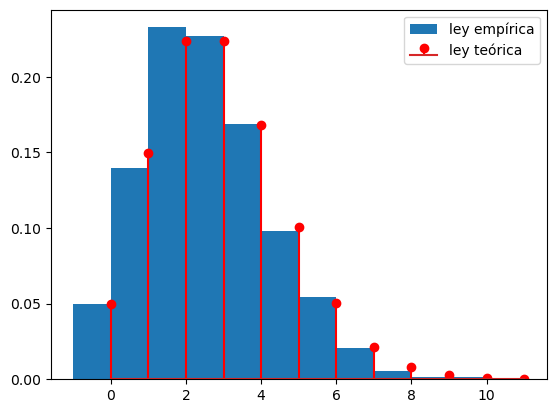

In [ ]:
# Simulación de la aproximación de la Bonomial a la Poisson
param=3 # Parametro de la Poisson que queremos aproximar
n=1000 # Este es el número de ensayos en la distribución binomial
N=5000 # Este es el número de simulaciones que realizaremos.

# Genera una muestra de N valores aleatorios de una distribución binomial con parámetros:
# n = 1000 (número de ensayos), p = param/n = 3/1000
X=npr.binomial(n,param/n,N)

# Calcular la frecuencia relativa de los valores simulados
counts = np.bincount(X) / float(N)

# Crear un array de valores posibles
x = np.arange(len(counts))

# Calcular la función de masa de probabilidad (FMP) de la distribución Poisson teórica
f_x = sps.poisson.pmf(x, param)

plt.close()
plt.bar(x - 0.5, counts, width=1., label="ley empírica")
p2 = plt.stem(x, f_x, "r", label="ley teórica")
plt.legend()
plt.show()


## Variable aleatoria Geométrica con parámetro $p\in (0,1)$.

Esta variable aleatoria cuenta el número de fracasos antes del primer éxito en ensayos bernoulli independientes con parámetro $0<p<1$, y su función de masa de probabilidades está dada por:
$$f_{X}(x)=\begin{cases}
	p(1-p)^{x-1} &\quad \text{si } x=1,2,\dots \\
	\qquad 0 &\quad \text{en otro caso}  
\end{cases}$$


**Notación:** $X\sim Geo(p)$

La cual es una función de densidad ya que:
* $0\le f_{X}(x)\le 1$ para toda $x$.
* $$\begin{align*}
	\sum_{x\in R_{X}}f_{X}(x) &= \sum_{x=1}^{\infty}(1-p)^{x-1}p \\
	&= p\sum_{y=0}^{\infty}(1-p)^{y} \\
	&= p\left(\frac{1}{1-(1-p)}\right) = 1
    \end{align*}$$

Si por el contrario queremos contar el número de éxitos antes del primer fracaso, tenemos que la función de está dada por:
$$f_{X}(x)=\begin{cases}
	p^{x}(1-p) &\quad \text{si } x=0,1,2,\dots \\
	\qquad 0 &\quad \text{en otro caso}  
\end{cases}$$

Para calcular la esperanza y varianza de $X$, necesitamos del siguiente lema:

**Lema 1.** Sea $x$ un número real tal que $│x│<1$. Entonces,
$$\sum_{k=1}^{\infty}kx^{k-1}=\frac{1}{(1-x)^2}.$$

Se tiene que la esperanza de $X$ es:
$$\begin{align*}
\mathbb{E}[X]&=\frac{1}{p}
\end{align*}$$
y calculamos,

Por el Lema 1, se tiene
$$\mathbb{E}[X^2]=p\frac{2}{p^3}-\frac{1}{p}=\frac{2}{p^2}-\frac{1}{p}.$$

Por lo tanto,
$$\text{Var}(X)=\frac{2}{p^2}-\frac{1}{p}-\frac{1}{p^2}=\frac{1-p}{p^2}.$$

### Gráfica de la distribución geométrica

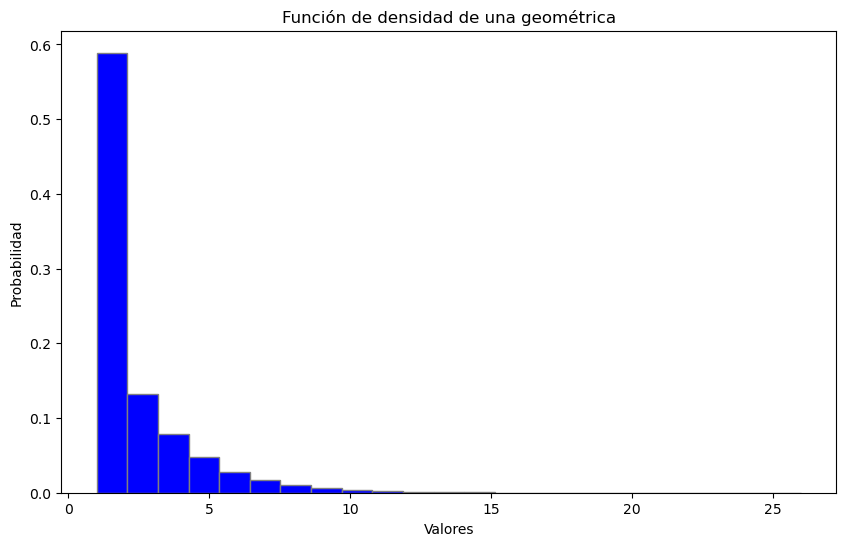

In [ ]:
p = 0.6 # probabilidad de éxito
s= 100000 # número de muestras

random.seed(3) #fijar una semilla
#Vamos a generar numeros aleatorios que siguen una distribución geométrica
geom_numeros = sps.geom.rvs(p,size=s)

#Creamos un histograma
plt.figure(figsize=(10,6))
plt.hist(
    geom_numeros,
    density=True, # Normaliza el area para que sea 1
    bins=len(np.unique(geom_numeros)), # número de barras del histograma
    color = "blue",
    edgecolor="grey"
)

plt.xlabel('Valores')
plt.ylabel('Probabilidad')
plt.title('Función de densidad de una geométrica')
plt.show() #mostrar el gráfica

## Variable aleatoria Binomial Negativa con parámetros $r\geq 1$ y $p\in (0,1)$.

Supongamos que se realizan ensayos independientes, cada uno con probabilidad $0<p<1$ de ser un éxito, hasta obtener un total de $r$ éxitos acumulados. Sea $X$ el número de ensayos que se requieren, entonces su función de masa de probabilidades está dada por:
$$ f_{X}(x)=\begin{cases}
	\binom{x-1}{r-1}p^{r}(1-p)^{x-r} &\quad \text{si } x=r,r+1,\dots \\
	\qquad 0 &\quad \text{en otro caso}  
\end{cases}$$

**Notación.** $X\sim \text{BN}(r,p)$.

Se tiene que
$$ \mathbb{E}[X]=\frac{r}{p}$$
y
$$ \text{Var}[X]=\frac{r(1-p)}{p^2}.$$

### Gráfica de la distribución Binomial Negativa

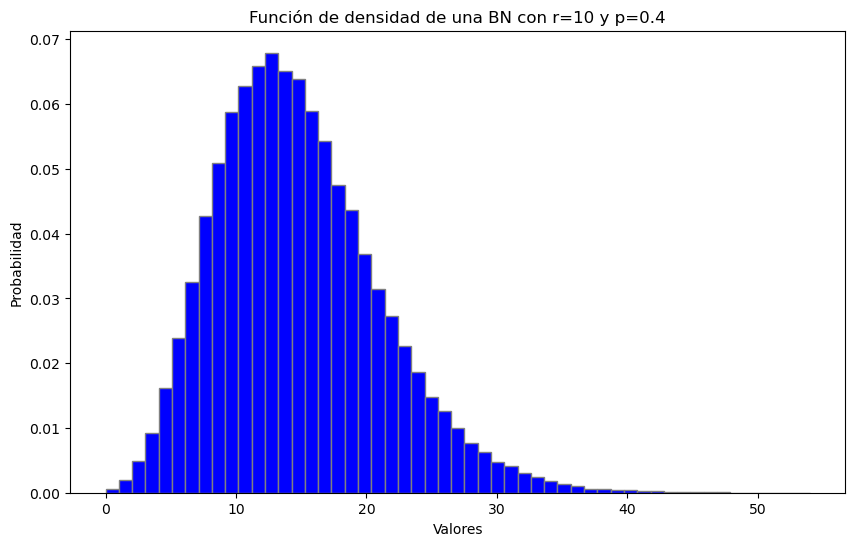

In [ ]:
r = 10
p = 0.4 # probabilidad de éxito
s= 100000 # número de muestras

random.seed(3) #fijar una semilla
#Vamos a generar numeros aleatorios que siguen una distribución geométrica
nbinom_numeros = sps.nbinom.rvs(r,p,size=s)

#Creamos un histograma
plt.figure(figsize=(10,6))
plt.hist(
    nbinom_numeros,
    density=True, # Normaliza el area para que sea 1
    bins=len(np.unique(nbinom_numeros)), # número de barras del histograma
    color = "blue",
    edgecolor="grey"
)

plt.xlabel('Valores')
plt.ylabel('Probabilidad')
plt.title('Función de densidad de una BN con r=10 y p=0.4')
plt.show() #mostrar el gráfica

$\color{red}{\text{Ejercicio 4.}}$ Un examen de Estadística consta de 20 preguntas tipo test y se conoce de experiencias
anteriores que un alumno tiene probabilidad 0.7 de contestar bien cada pregunta. Obtener:

a) La probabilidad de que la primera pregunta que contesta bien sea la cuarta.

b) Sabiendo que para aprobar el examen es necesario contestar bien a 10 preguntas, ¿cuál es la probabilidad de que apruebe al contestar la pregunta duodécima?



$\color{red}{\text{Solución}}$

In [43]:
import math

def probabilidad_primera_correcta_en_cuarta(p_correcta=0.7):
    p_incorrecta = 1 - p_correcta
    return (p_incorrecta ** 3) * p_correcta

def probabilidad_aprobar_en_12(p_correcta=0.7, respuestas_necesarias=10, total_preguntas=12):
    probabilidad = 0
    for k in range(respuestas_necesarias, total_preguntas + 1):
        combinaciones = math.comb(total_preguntas, k)
        probabilidad += combinaciones * (p_correcta ** k) * ((1 - p_correcta) ** (total_preguntas - k))
    return probabilidad

if __name__ == "__main__":
    p_correcta = 0.7
    print("Probabilidad de que la primera respuesta correcta sea en la cuarta pregunta:", probabilidad_primera_correcta_en_cuarta(p_correcta))
    print("Probabilidad de aprobar al responder 12 preguntas:", probabilidad_aprobar_en_12(p_correcta))

Probabilidad de que la primera respuesta correcta sea en la cuarta pregunta: 0.018900000000000007
Probabilidad de aprobar al responder 12 preguntas: 0.2528153478549999


$\color{red}{\text{Ejercicio 5.}}$ Investigue sobre el problema de la caja de cerillos de Banach y explique su solución.

$\color{red}{\text{Solución}}$

El problema dice lo siguiente:

Supongamos que un matemático lleva siempre consigo dos cajas de fósforos: una en su bolsillo izquierdo y otra en el derecho. Cada vez que necesita un fósforo, tiene la misma probabilidad de tomarlo de cada bolsillo. Supongamos que mete la mano en su bolsillo y descubre por primera vez que la caja elegida está vacía. Si se asume que cada una de las cajas de fósforos originalmente contenía $n$ fósforos, ¿cuál es la probabilidad de que haya exactamente $k$ fósforos en la otra caja?

In [49]:
import random
import matplotlib.pyplot as plt


def simular_cajas_banach(n_cerillos=40, ensayos=10000):
    cerillos_restantes = []

    for _ in range(ensayos):
        caja_izquierda = n_cerillos
        caja_derecha = n_cerillos

        while caja_izquierda > 0 and caja_derecha > 0:
            if random.choice([True, False]):
                caja_izquierda -= 1
            else:
                caja_derecha -= 1

        cerillos_restantes.append(max(caja_izquierda, caja_derecha))

    return cerillos_restantes

## Variable aleatoria Hipergeométrica con parámetros $n,N,m$.

Supongamos que se elige, sin reemplazo, una muestra de tamaño $n$ de una urna que contiene $N$ bolas, de las cuales $m$ son rojas y $N-m$ son verdes. Sea $X$ el número de bolas rojas seleccionadas, entonces su función de masa de probabilidades está dada por:
$$ f_{X}(x)=
	\frac{\binom{m}{x}\binom{N-m}{n-x}}{\binom{N}{n}} \quad \text{si } x=0,1,\dots, n $$

**Notación.** $X\sim \text{Hiper}(n,N,m)$.

Se tiene que
$$ \mathbb{E}[X]=\frac{nm}{N}$$
y
$$ \text{Var}[X]=\frac{nm}{N}\left[\frac{(n-1)(m-1)}{N-1}+1-\frac{nm}{N} \right].$$

**Nota.** Si $x\leq n$ y $X\sim \text{Hiper}(n,N,m)$, cuando $p=\frac{m}{N}$ y $m,N$ son muy grandes con respecto a $n$ y $x$:
$$\mathbb{P}(X=x)\approx \binom{n}{x}p^{x}(1-p)^{n-x}.$$

$\color{red}{\text{Ejercicio 6.}}$ Replicar la grafica de la función de densidad



$\color{red}{\text{Solución}}$

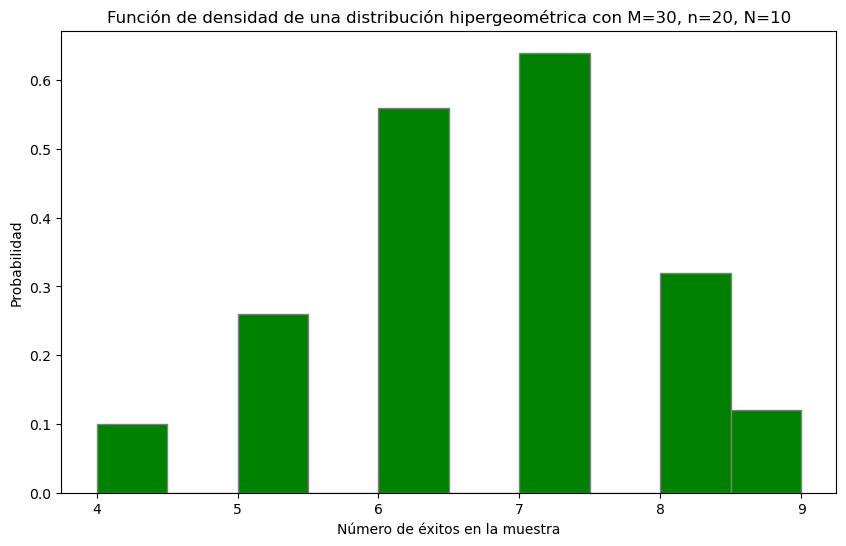

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps

# Parámetros
M = 30   
n = 20   
N = 10   
s = 100

# Fijar la semilla para reproducibilidad
np.random.seed(3)

# Generamos números aleatorios que siguen una distribución hipergeométrica
hypergeom_numeros = sps.hypergeom.rvs(M, n, N, size=s)

# Creamos un histograma
plt.figure(figsize=(10,6))
plt.hist(
    hypergeom_numeros,
    density=True,  # Normaliza el área para que sea 1
    bins=10,       # Número de barras del histograma
    color="green",
    edgecolor="grey"
)

plt.xlabel('Número de éxitos en la muestra')
plt.ylabel('Probabilidad')
plt.title(f'Función de densidad de una distribución hipergeométrica con M={M}, n={n}, N={N}')
plt.show()  # Mostrar la gráfica

$\color{red}{\text{Ejercicio 7.}}$ Una compañía petrolera realiza un estudio geológico que indica que un pozo petrolero exploratorio debería tener un 20% de posibilidades de encontrar petróleo.

- ¿Cuál es la probabilidad de que el primer pozo se produzca en el tercer pozo perforado?

- ¿Cuál es la probabilidad de que el tercer pozo se produzca en el séptimo pozo perforado?

- ¿Cuál es la media y la varianza del número de pozos que se deben perforar si la compañía petrolera quiere establecer tres pozos productores?

$\color{red}{\text{Solución}}$

In [63]:
#¿Cuál es la probabilidad de que el primer pozo se produzca en el tercer pozo perforado?

def probabilidad_pozo(p, k):
    return (1 - p) ** (k - 1) * p

p = 0.20
k = 3
probabilidad = probabilidad_pozo(p, k)
print(probabilidad)

0.12800000000000003


In [65]:
#¿Cuál es la probabilidad de que el tercer pozo se produzca en el séptimo pozo perforado?
import scipy.stats as stats
p = 0.20  
r = 3     
k = 7     

probabilidad = stats.nbinom.pmf(k, r, p)


print(f"La probabilidad de que el tercer pozo exitoso se produzca en el séptimo pozo perforado es: {probabilidad}")

La probabilidad de que el tercer pozo exitoso se produzca en el séptimo pozo perforado es: 0.06039797760000005


In [67]:
# Parámetros
p = 0.20  
r = 3     

media = r / p
varianza = r * (1 - p) / (p ** 2)

print(f"Media: {media}")
print(f"Varianza: {varianza}")

Media: 15.0
Varianza: 60.0


# -----------------------------------------
## 2.2 Variables Aleatorias Continuas
# -----------------------------------------

**Definición.** Una variable aleatoria absolutamente continua es aquella para la cual existe una función $f_X$ no negativa, llamada función de densidad, tal que:
$$
F_X(x) = \mathbb{P}(X\leq x) = \int_{-\infty}^{x} f_X(y) dy, \quad x\in \mathbb{R}
$$

**Lema.** Sea $F_X$ una función de distribución. Supongamos que $F_X$ es derivable y que su derivada es continua en $(a, b)$, donde:
$ a = \inf \{ x \in \mathbb{R} \mid F_X(x) > 0 \}, \quad b = \sup \{ x \in \mathbb{R} \mid F_X(x) < 1 \}$
entonces, la función de densidad se puede obtener como:
$$ f_X(x) =
\begin{cases} 
F'_X(x), & \text{si } x \in (a, b), \\
0, & \text{e.o.c.}
\end{cases}$$

Es decir,
$$ \frac{dF_X(x)}{dx} = f_X(x)$$

In [79]:
import numpy as np # Importamos Numpy
import numpy.random as npr # para generar numeros aleatorios

import scipy.stats as sps # Importamos el modulo SciPy
from scipy.stats import randint # para trabajar una uniforme discreta en un rango de enteros

import matplotlib.pyplot as plt #Visualizar datos 

import random # para generar numeros aleatorios

## Variable aleatoria uniforme sobre el intervalo $(a,b)$.

Una variable aleatoria $X$ se dice que tiene distribución uniforme continua  en el intervalo $(a,b)$ con $a,b\in\mathbb{R}$, si su función de densidad esta dada por:
$$f_{X}(x)=\begin{cases}
	\frac{1}{b-a} &\quad \text{si } a< x < b\\
	\qquad 0 &\quad \text{en otro caso}  
\end{cases}$$

**Notación.** $X\sim \text{Unif}(a,b)$ $\text{Unif}[a,b]$

**Obs:**
* La distribución uniforme continua en $(a,b)$ es simétrica.
* A los intervalos de la misma longitud contenidos en $(a,b)$ se les asigna la misma probabilidad. Esto se representa gráficamente con la probabilidad de que $X$ se encuentre en el intervalo $(s,t)$:


La función de distribución de $X\sim Unif((a,b))$ esta dada por:
$$F_{X}(x)=\begin{cases}
	 0 &\quad \text{si } x\le a \\
	\frac{x-a}{b-a} &\quad \text{si } a<x<b\\
	 1 &\quad \text{si } x\ge b  
\end{cases}$$

La esperanza de una variable aleatoria uniforme es la siguiente,
$$\begin{align*}
\mathbb{E}[X] &= \int_{a}^{b}xf_{X}(x)dx = \int_{a}^{b}x\frac{1}{b-a}dx = \frac{1}{b-a}\int_{a}^{b}xdx  = \frac{1}{b-a}\left[\frac{x^{2}}{2}\right]_{a}^{b} \\ &= \frac{1}{b-a}\left[\frac{b^{2}}{2}-\frac{a^{2}}{2}\right] =  \frac{b^{2}-a^{2}}{2(b-a)} = \frac{(b-a)(b+a)}{2(b-a)} = \frac{a+b}{2}.
\end{align*}$$

Para calcular la varianza, primero vamos a calcular el segundo momento
$$\begin{align*}
\mathbb{E}[X^{2}] &= \int_{a}^{b}x^{2}f_{X}(x)dx = \int_{a}^{b}x^{2}\frac{1}{b-a}dx = \frac{1}{b-a}\int_{a}^{b}x^{2}dx \\ &= \frac{1}{b-a}\left[\frac{x^{3}}{3}\right]_{a}^{b} = \frac{1}{b-a}\left[\frac{b^{3}}{3}-\frac{a^{3}}{3}\right] =  \frac{b^{3}-a^{3}}{3(b-a)}.
\end{align*}$$

Por lo que se tiene lo siguiente

$$Var(X) = \mathbb{E}[X^{2}]-(\mathbb{E}[X])^{2} =\frac{b^{3}-a^{3}}{3(b-a)}-\left(\frac{a+b}{2}\right)^{2} = \frac{(b-a)^{2}}{12}.$$

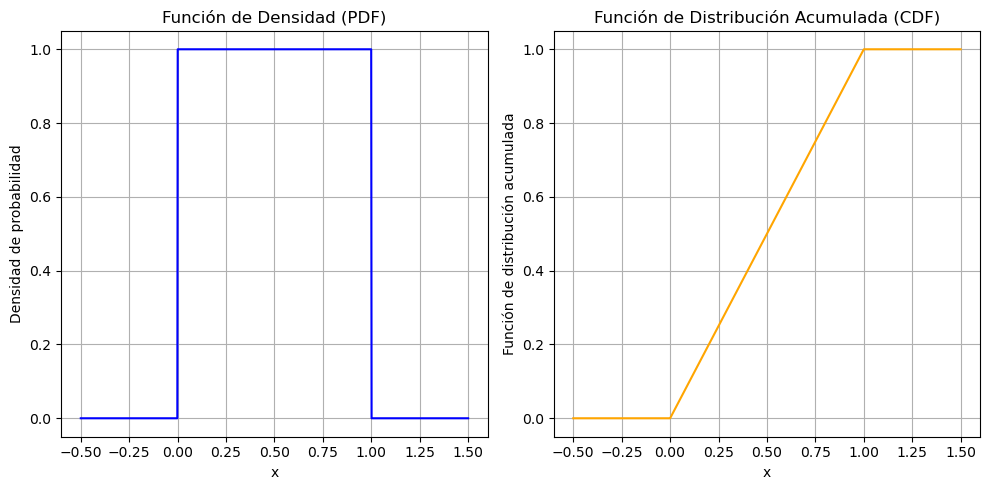

In [82]:
# Parámetros de la distribución uniforme
a = 0  # límite inferior
b = 1  # límite superior

# Definimos las funciones de densidad y distribución
# Función de densidad (pdf) de la distribución uniforme
def uniform_pdf(x, a, b):
    return np.where((x >= a) & (x <= b), 1 / (b - a), 0)

# Función de distribución (cdf) de la distribución uniforme
def uniform_cdf(x, a, b):
    return np.where(x < a, 0, np.where(x > b, 1, (x - a) / (b - a)))
    
# Generar valores de x
x = np.linspace(-0.5, 1.5, 1000)

# Calcular la función densidad 
pdf_values = uniform_pdf(x, a, b)

# Calcular la función de distribución
cdf_values = uniform_cdf(x, a, b)

# Graficar la PDF
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(x, pdf_values, label='PDF', color='blue')
plt.xlabel('x')
plt.ylabel('Densidad de probabilidad')
plt.title('Función de Densidad (PDF)')
plt.grid(True)

# Graficar la CDF
plt.subplot(1, 2, 2)
plt.plot(x, cdf_values, label='CDF', color='orange')
plt.xlabel('x')
plt.ylabel('Función de distribución acumulada')
plt.title('Función de Distribución Acumulada (CDF)')
plt.grid(True)

plt.tight_layout()
plt.show()

**Ejemplo.** 	Sea $X\sim Unif((-3,2))$. Vamos a calcular: $P(X\ge 0)$ y
$P(-5 \le X \le 1/2)$.

**Solución.** La función de densidad de esta variable aleatoria esta dada por:
$$f_{X}(x)=\begin{cases}
	\quad \frac{1}{5} &\quad \text{si } -3\le x \le 2\\
	\quad 0 &\quad \text{e.o.c}  
\end{cases}$$
Entonces,

$$\begin{align}
\mathbb{P}(X\ge 0) &= \int_{0}^{2}\frac{1}{5}dx=\frac{1}{5}x\Big|_{0}^{2}=\frac{2}{5} \\
\mathbb{P}(-5 \le X \le 1/2) &= \int_{-5}^{-3}f_{X}(x)dx+\int_{-3}^{1/2}\frac{1}{5}dx=\frac{1}{5}x\Big|_{-3}^{1/2}=\frac{1}{5}\left(\frac{1}{2}+3\right)=\frac{7}{10}
\end{align}$$

Utilizando la $F_X$, se tiene:

- $\mathbb{P}(X\ge 0)=1-F_X(0)$ 

In [85]:
from scipy.stats import uniform

# Parámetros de la distribución uniforme
a = -3  # límite inferior
b = 2   # límite superior

# Crear el objeto de distribución uniforme usando scipy
uniform_dist = uniform(loc=a, scale=b-a)

# Calcular P(X >= 0) = 1 - P(X < 0)
p_0 = 1 - uniform_dist.cdf(0)

# Calcular P(-5 <= X <= 1/2)
p_interval = uniform_dist.cdf(1/2) - uniform_dist.cdf(-5)

# Imprimir los resultados
print(f"P(X >= 0) = {p_0}")
print(f"P(-5 <= X <= 1/2) = {p_interval}")

P(X >= 0) = 0.4
P(-5 <= X <= 1/2) = 0.7


$\color{red}{\text{Ejercicio 1.}}$ Un alumno se dirige a la biblioteca para solicitar el préstamo de un libro y decide que no puede esperar más de $10$ minutos en ser atendido. Supongamos que el bibliotecario tarda por lo menos $0.5$ minutos en atender a una persona, entonces es razonable proponer una distribución uniforme en el intervalo $[0.5,10]$ para modelar el comportamiento de la variable $X$ que es el tiempo en ser atendido (en  minutos).

- Da la función de densidad y gráfica.
- ¿Cuál es la probabilidad de que el tiempo en ser atendido sea mayor a $5$ minutos pero menor a $8$ minutos?
- ¿Cuál es la esperanza y varianza?
- Calcula la función de distribución y gráficala, y con ella calcula: $\mathbb{P}(2.51\le X \le 7.99)$.

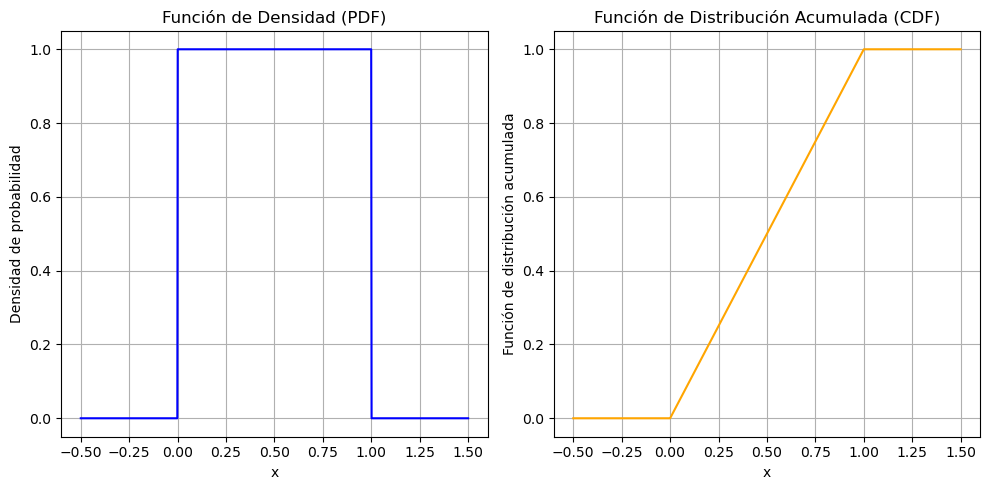

In [88]:
from scipy.stats import uniform

# Parámetros de la distribución uniforme
a = 0  # límite inferior
b = 1  # límite superior

# Crear el objeto de distribución uniforme usando scipy
uniform_dist = uniform(loc=a, scale=b-a)

# Generar valores de x
x = np.linspace(-0.5, 1.5, 1000)

# Calcular la PDF usando scipy
pdf_values = uniform_dist.pdf(x)

# Calcular la CDF usando scipy
cdf_values = uniform_dist.cdf(x)

# Graficar la PDF
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(x, pdf_values, label='PDF', color='blue')
plt.xlabel('x')
plt.ylabel('Densidad de probabilidad')
plt.title('Función de Densidad (PDF)')
plt.grid(True)

# Graficar la CDF
plt.subplot(1, 2, 2)
plt.plot(x, cdf_values, label='CDF', color='orange')
plt.xlabel('x')
plt.ylabel('Función de distribución acumulada')
plt.title('Función de Distribución Acumulada (CDF)')
plt.grid(True)

plt.tight_layout()
plt.show()

$$\mathbb{P}(X\ge 0) = 1-\mathbb{P}(X<0) = 1-F_X (0)$$

$$F_X(x):=\mathbb{P}(X\le x)$$


$$\mathbb{P}(-5 \le X \le 1/2) = F_X (1/2)-F_X(-5)$$

## Ejercicio Variable aleatoria Uniforme

$\color{red}{\text{Ejercicio 1.}}$ Un alumno se dirige a la biblioteca para solicitar el préstamo de un libro y decide que no puede esperar más de $10$ minutos en ser atendido. Supongamos que el bibliotecario tarda por lo menos $0.5$ minutos en atender a una persona, entonces es razonable proponer una distribución uniforme en el intervalo $[0.5,10]$ para modelar el comportamiento de la variable $X$ que es el tiempo en ser atendido (en  minutos).

- Da la función de densidad y gráfica.
- ¿Cuál es la probabilidad de que el tiempo en ser atendido sea mayor a $5$ minutos pero menor a $8$ minutos?
- ¿Cuál es la esperanza y varianza?
- Calcula la función de distribución y con ella calcula: $\mathbb{P}(2.51\le X \le 7.99)$.

### Primer Inciso
Sea $X\sim Unif((0.5,10))$. Vamos a calcular: $P(X\ge 0)$ y
$P(-5 \le X \le 1/2)$.
**Solución.** La función de densidad de esta variable aleatoria esta dada por:
$$f_{X}(x)=\begin{cases}
	\quad \frac{1}{10-0.5} &\quad \text{si } 0.5\le x \le 10\\
	\quad 0 &\quad \text{e.o.c}  
\end{cases}$$


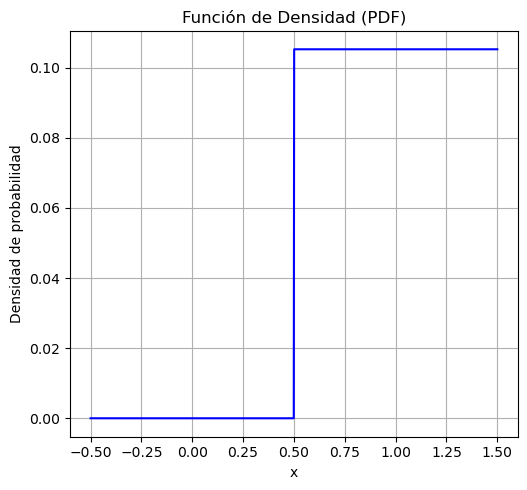

In [5]:
import numpy as np # Importamos Numpy
import numpy.random as npr # para generar numeros aleatorios

import scipy.stats as sps # Importamos el modulo SciPy
from scipy.stats import randint # para trabajar una uniforme discreta en un rango de enteros

import matplotlib.pyplot as plt #Visualizar datos 

import random # para generar numeros aleatorios

# Parámetros de la distribución uniforme
a = 0.5  # límite inferior
b = 10  # límite superior

# Definimos las funciones de densidad y distribución
# Función de densidad (pdf) de la distribución uniforme
def uniform_pdf(x, a, b):
    return np.where((x >= a) & (x <= b), 1 / (b - a), 0)
  
# Generar valores de x
x = np.linspace(-0.5, 1.5, 1000)

# Calcular la función densidad 
pdf_values = uniform_pdf(x, a, b)

# Graficar la PDF
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(x, pdf_values, label='PDF', color='blue')
plt.xlabel('x')
plt.ylabel('Densidad de probabilidad')
plt.title('Función de Densidad (PDF)')
plt.grid(True)

plt.tight_layout()
plt.show()

### Segundo Inciso
$$\begin{align}
\mathbb{P}(5 \le X \le 8) &= \int_{5}^{8}\frac{1}{10-0.5}dx=\frac{1}{10-0.5}x\Big|_{5}^{8}=\frac{1}{9.5}\left({8}-{5}\right)=\frac{3}{9.5}
\end{align}$$

### Tercer Inciso
La esperanza de una variable aleatoria uniforme es la siguiente,
$$\begin{align*}
\mathbb{E}[X] &= \int_{0.5}^{10}xf_{X}(x)dx = \frac{0.5+10}{2}={5.25}.
\end{align*}$$

Para calcular la varianza, primero vamos a calcular el segundo momento
$$\begin{align*}
\mathbb{E}[X^{2}] &= \int_{0.5}^{10}x^{2}f_{X}(x)dx = \frac{{10}^{3}-{0.5}^{3}}{3(10-0.5)}={35.08}.
\end{align*}$$

Por lo que se tiene lo siguiente

$$Var(X) = \frac{(10-0.5)^{2}}{12}={7.52}.$$

### Cuarto Inciso
La función de distribución de $X\sim Unif((0.5,10))$ esta dada por:
$$F_{X}(x)=\begin{cases}
	 0 &\quad \text{si } x\le 0.5 \\
	\frac{x-0.5}{10-0.5} &\quad \text{si } 0.5<x<10\\
	 1 &\quad \text{si } x\ge 10  
\end{cases}$$

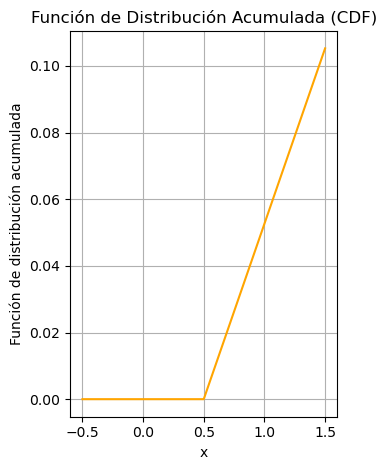

In [16]:
# Parámetros de la distribución uniforme
a = 0.5  # límite inferior
b = 10  # límite superior

# Definimos las funciones de densidad y distribución

# Función de distribución (cdf) de la distribución uniforme
def uniform_cdf(x, a, b):
    return np.where(x < a, 0, np.where(x > b, 1, (x - a) / (b - a)))
    
# Generar valores de x
x = np.linspace(-0.5, 1.5, 1000)

# Calcular la función de distribución
cdf_values = uniform_cdf(x, a, b)

# Graficar la CDF
plt.subplot(1, 2, 2)
plt.plot(x, cdf_values, label='CDF', color='orange')
plt.xlabel('x')
plt.ylabel('Función de distribución acumulada')
plt.title('Función de Distribución Acumulada (CDF)')
plt.grid(True)

plt.tight_layout()
plt.show()

$$\begin{align}
\mathbb{P}(2.51 \le X \le 7.99) &= \int_{2.51}^{7.99}\frac{1}{10-0.5}dx=\frac{1}{10-0.5}x\Big|_{2.51}^{7.99}=\frac{1}{9.5}\left({7.99}-{2.51}\right)=\frac{5.48}{9.5}
\end{align}$$

## Variable aleatoria exponencial con parámetro $\lambda >0$.

La distribución exponencial es una de las distribuciones continuas más utilizadas. A menudo se utiliza para modelar el tiempo transcurrido entre eventos.  

Algunos ejemplos en los que podría utilizarse la distribución exponencial son:
* El tiempo transcurrido en un call center hasta recibir la primer llamada del día.
* El  tiempo entre terremotos de una determinada magnitud.
* Supongamos una máquina que produce hilo de alambre, la cantidad de metros de alambre hasta encontrar una falla en el alambre se podría modelar como una exponencial.

Se dice que la variable aleatoria $X$ tiene distribución exponecial de parámetro $\lambda>0$, si su función de densidad está dada por:
$$f_{X}(x)=\begin{cases}
\lambda e^{-\lambda x} & x>0\\
0 & \text{en otro caso}
\end{cases}$$


Notación. $X\sim \exp(\lambda).$

$\textbf{Propiedad de pérdida de memoria:}$
$$\mathbb{P}(X>t+s \mid X>t)=\mathbb{P}(X>s)=e^{-\lambda s}.$$

Ejercicio: Demostrar la propiedad de pérdida de memoria para $X\sim \exp(\lambda)$.

Ejemplo: hipótesis natural para modelar las duraciones de vida de átomos radioactivas (Rutherford y Soddy). Cada átomo radioactivo posee una duración de vida que sigue una ley exponencial. En este campo, el parámetro $\lambda$ se llama la constante de desintegración.

 Si $t\mapsto \rho(t)=\mathbb{P}(X>t)$ verifica
$$\rho(t+s)=\rho(t)\rho(s),$$
de manera que (derivando en $s$, con $s=0$),
$$\rho^{\prime}(t)=-\rho(t)\lambda \qquad \ \lambda=-\rho^{\prime}(0)\geq 0.$$
Así,
$$\rho(t)=e^{-\lambda t} \qquad \text{y} \qquad f(t)=\lambda e^{-\lambda t} \ \  \rho(0)=1.$$



La esperanza y varianza de de una distribución exponencial de la forma $$f_{X}(x)=\begin{cases}
\frac{1}{\lambda} e^{-\frac{x}{\lambda}} & x>0\\
0 & \text{en otro caso}
\end{cases}$$:
$$\mathbb{E}[X]= \int_{0}^{\infty}xf_{x}(x)dx = \int_{0}^{\infty}x\frac{1}{\lambda}e^{-\frac{x}{\lambda}}dx = \lambda$$
y
\begin{align*}
\text{Var}(X) &= \mathbb{E}[X^{2}]-(\mathbb{E}[X])^{2} = \int_{0}^{\infty}x^{2}f_{x}(x)dx-\lambda^{2} \\ &= \int_{0}^{\infty}x^{2}\frac{1}{\lambda}e^{-\frac{x}{\lambda}}dx - \lambda^{2} = \lambda^{2}
\end{align*}

**Ejemplo**

Consideremos la variable aleatoria $X$ como el tiempo (en minutos) entre la llegada de dos personas a la fila  de una sucuarsal bancaria.

Adicionalmente, el banco ha determinado que solo el $10\%$ de las veces, el tiempo que transcurre entre la llegada de una persona y otra es mayor a dos minutos.

Esto permite calcular el valor de $\lambda$, ya que
$$\mathbb{P}(X>2)=0.1$$
entonces
$$1-\mathbb{P}(X\le 2) = 1-F_{X}(2) = 0.1$$

NOtemos que si $X\sim Exp\left( \lambda \right)$, entonces $F_{X})(x) = 1-e^{-\frac{x}{\lambda}}$

Por lo que $F_{X}(2)= 1-e^{\frac{-2}{\lambda}} =0.9$, entonces
$e^{\frac{-2}{\lambda}}=0.1$. Por lo que
$$\frac{-2}{\lambda}=\ln(0.1) \Rightarrow \lambda=0.87$$
Por lo tanto $X\sim\exp(0.87)$.

Ahora queremos calcular la probabilidad de que entre la llegada de una persona y otra transcurra por lo menos un minuto, lo cual puede calcularse de dos formas:


\begin{align*}
\mathbb{P}(X>1) &= \int_{1}^{\infty}f_{X}(x)dx = \int_{1}^{\infty}\frac{1}{0.87}e^{\frac{-x}{0.87}}dx = 0.32
\end{align*}
\item \begin{align*}
\mathbb{P}(X>1) &= 1-\mathbb{P}(X\le 1) = 1-\left[1-e^{\frac{-1}{0.87}}\right] = -e^{\frac{-1}{0.87}}
\end{align*}


$\color{red}{\text{Ejercicio 2.}}$ Calcular las probabilidades con Scipy

Una propiedad interesante de la distribución exponencial es que puede verse como un análogo continuo de la distribución geométrica. Para ver esto, recuerde el experimento aleatorio detrás de la distribución geométrica: lanza una moneda (repite un experimento de Bernoulli) hasta que observa las primeras caras (éxito).


$\mathbf{Teorema.-}$ Sea $\varepsilon>0$ y $Y_{\epsilon}\sim Geo(p_{\varepsilon})$. Supongamos que nos encontramos en el regimen:
$$\lim_{\varepsilon\to 0}p_{\varepsilon}=0 \qquad \text{y} \qquad \varepsilon^{-1}p_{\varepsilon}\sim \lambda>0$$
   Sea $X_{\varepsilon}:=\varepsilon Y_{\varepsilon}$. Entonces,
   $$\lim_{\varepsilon\to 0}F_{X_{\varepsilon}}(x)=F_{X}(x),$$
   en donde $X\sim \exp(\lambda)$. Este también es un resultado de convergencia en ley.

Visualicemos lo anterior:

También, tenemos el siguiente resultado:

$\mathbf{Teorema.-}$ Sea $X\sim \exp(1)$. Si $Y=\min\{k\in \mathbb{Z}: k\geq \lambda X \}$, con $\lambda>0$, entonces
$$Y\sim Geo\left(p=1-e^{-1/\lambda} \right).$$

## Variable aleatoria normal con parámetros media $\mu$ y varianza $\sigma^{2}$.

La distribución normal es una de las más importantes y de mayor uso tanto en la teoría de la probabilidad, como en la teoría estadística.

También llamada distribución gaussiana, en honor a Gauss, a quien se considera el padre de ésta distribución.

La importancia de la distribución normal, radica en el famoso Teorema central del límite. Fue descubierta por De Moivre en 1733 como un límite de la distribución binomial.


La importancia de esta distribución radica en que permite modelar numerosos fenómenos naturales, sociales y psicológicos, por ejemplo:
* Estatura
* Efectos de un fármaco
* Consumo de cierto producto por un grupo de individuos
* Coeficiente intelectual
* Nivel de ruido en telecomunicaciones
* Errores cometidos al medir ciertas magnitudes

Además, esta distribución juega un papel de suma importancia en la inferencia estadística.

Se dice que la variable aleatoria $X$ tiene distribución normal de parámetros $\mu$ y $\sigma^{2}$, donde $\mu,\sigma\in\mathbb{R}$ y $\sigma>0$, si su función de densidad está dada por:
$$f_{X}(x)=\begin{cases}
	\frac{1}{\sqrt{2\pi\sigma^{2}}}e^{-\frac{(x-\mu)^{2}}{2\sigma^{2}}} &\quad \text{si }  x \in\mathbb{R} \\
	\qquad 0 &\quad \text{e.o.c}  
\end{cases}$$

**Notación.** $X\sim N(\mu,\sigma^{2})$


Tal curva (**la campana de Gauss-Bell**) es una función que depende de los parámetros $\mu$ y $\sigma^{2}$.


**Observación:** El parámetro $\mu$ se llama *media* y el  parámetro $\sigma^{2}$ se llama *varianza*.

La función de densidad definida anteriormente es efecto función de densidad, ya que
$$\int_{\mathbb{R}}f_{X}(x)dx = \int_{\mathbb{R}}\frac{1}{\sqrt{2\pi\sigma^{2}}}e^{-\frac{(x-m)^{2}}{2\sigma^{2}}}  = 1 $$

Variable aleatoria normal con parámetros  0  y  1 .
La ley de $Z\sim N(0,1)$ está dada por la función de densidad
$$
f_{Z}(z) = \frac{1}{\sqrt{2\pi}}e^{-\frac{z^2}{2}},
$$
para $z\in \mathbb{R}$.

Sabemos que:
* La varianza es usada como una medida para comparar la dispersión en dos o más conjuntos de observaciones.
* Una desviación estándar pequeña indica que los valores de la variable aleatoria se encuentran cercanos a la media.
* Una desviación estándar grande indica que los valores de la variable aleatoria se dispersan mucho con respecto a la media.

La función de distribución de una variable aleatoria $X\sim N(\mu,\sigma^{2})$ está dada por:
$$F_{X}(x) = \int_{-\infty}^{x}\frac{1}{\sqrt{2\pi\sigma^{2}}}e^{-\frac{(y-\mu)^{2}}{2\sigma^{2}}}dy$$

Esta nos proporciona la probabilidad de que $X$ tome calores menores o iguales a un valor específico $x$, y corresponde al área bajo la curva en el intervalo $(-\infty,x]$:

No es sencillo calcular $F_{X}(x)$, pero cualquier v.a. gaussiana puede transformarse a una v.a. estandarizada. Existen tablas para esta v.a., lo cual hace los cálculos más fáciles.

**Proposición**  Sea $X\sim N(\mu,\sigma^{2})$, entonces
$$Z=\frac{X-\mu}{\sigma}$$
tiene una distribución gaussiana con media $0$ y varianza $1$, es decir, $Z\sim N(0,1)$.


**Demostración** 	Primero vamos a calcular la función de distribución de $Z$:
$$F_{Z}(z):=\mathbb{P}(Z\le z) = \mathbb{P}\left(\frac{X-\mu}{\sigma}\le z\right) = \mathbb{P}(X\le \sigma z + \mu) := F_{X}(\sigma z + \mu)$$
Entonces, la función de densidad de $Z$ esta dada por:
$$f_{Z}(z) = \frac{dF_{Z}(z)}{dz} = \frac{dF_{X}(\sigma z + \mu)}{dz} = \sigma f_{X}(\mu+\sigma z) = \frac{e^{-z^{2}/2}}{\sqrt{2\pi}}$$

Decimos que $X$ tiene distribución gaussiana estándar (normal estándar), $X\sim N(0,1)$, si su función de densidad esta dada por:
$$f_{X}(x)=\begin{cases}
	\frac{e^{-x^{2}/2}}{\sqrt{2\pi}} &\quad \text{si }  x \in\mathbb{R} \\
	\quad 0 &\quad \text{e.o.c}  
\end{cases}$$

Podemos calcular cualquier probabilidad de la forma
$$\mathbb{P}(a<X<b)$$
de la siguiente manera: para $z\ge 0$, definimos
$$\Phi(z) = \frac{1}{\sqrt{2\pi}}\int_{0}^{z}e^{-x^{2}/2}dx.$$


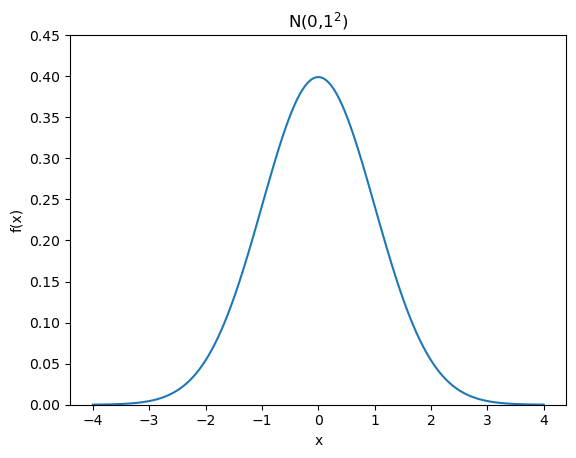

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
fig, ax = plt.subplots()
x= np.arange(-4,4,0.001) #generar valores de x
ax.set_title('N(0,$1^2$)')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.plot(x, norm.pdf(x))
ax.set_ylim(0,0.45)
plt.show()

Propiedades de la función de densidad de probabilidades de una distribución normal estándar:

1. Es positiva: $f(x)\geq 0$ para todo $x$ real.
2. Es continua y derivable en todas partes.
3. Es simétrica alrededor de $\mu$.
4. Conforme $x$ toma valores muy grandes de manera positiva y negativa, la función decrece hacia cero muy rápidamente.
5. Tiene un máximo global.
6. El área total bajo la curva es igual a $1$.

Veamos el comportamiento de la función conforme se cambia la varianza.

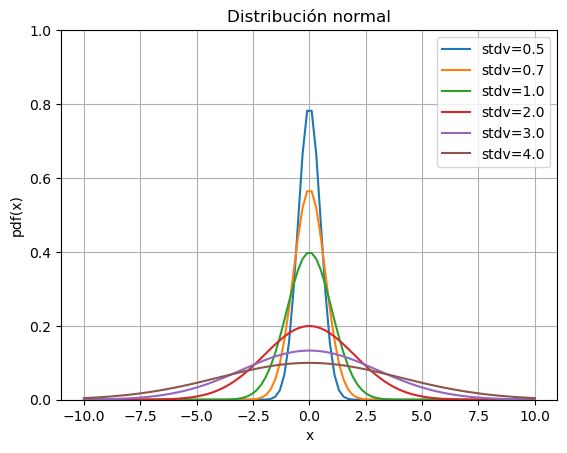

In [100]:
from scipy.stats import norm
fig, ax = plt.subplots()
x = np.linspace(-10,10,100)
stdvs = [0.5, 0.7, 1.0, 2.0, 3.0, 4.0]
for s in stdvs:
    ax.plot(x, norm.pdf(x,scale=s), label='stdv=%.1f' % s)

ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.set_title('Distribución normal')
ax.legend(loc='best', frameon=True)
ax.set_ylim(0,1)
ax.grid(True)

Veamos el comportamiento de la función conforme se cambia la media.

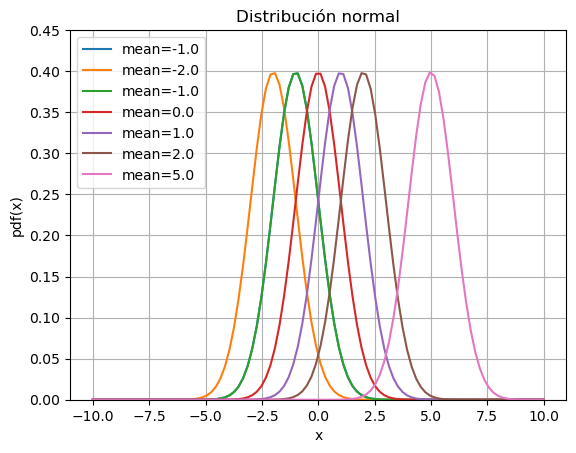

In [103]:
from scipy.stats import norm
fig, ax = plt.subplots()
x = np.linspace(-10,10,100)
means = [-1.0,-2.0, -1.0, 0.0, 1.0, 2.0, 5.0]
for mean in means:
    ax.plot(x, norm.pdf(x,loc=mean), label='mean=%.1f' % mean)

ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.set_title('Distribución normal')
ax.legend(loc='best', frameon=True)
ax.set_ylim(0,0.45)
ax.grid(True)

### Función de distribución acumulativa de una normal $N(\mu,\sigma^2)$.

Gracias a las propiedades anteriores, es posible calcular áreas delimitadas de la función $f$. Si $a$ y $b$ son reales cualesquiera, denotaremos por
$$P(a\leq X\leq b),$$
la probabilidad de que $X$ esté en el intervalo $[a,b]$, al área bajo la curva de $f(x)$ sobre el intervalo $[a,b]$.

También, $P(X\leq x)$ denotara al área bajo la curva de la función $f(x)$ sobre el intervalo $(-\infty,x)$ y $P(X>x)$ denotara al área bajo la curva de la función $f(x)$ sobre el intervalo $(x, \infty)$.

A la probabilidad $\text{cdf}(x):=P(X\leq x)$ se llama la distribución acumulativa (hasta el valor $x$) de $f(x)$.

Con la notación anterior,
$$P(a\leq X\leq b)=\text{cdf}(b)-\text{cdf}(a)$$
y
$$\text{sf}(a):=P(X>a)=1-\text{cdf}(a).$$

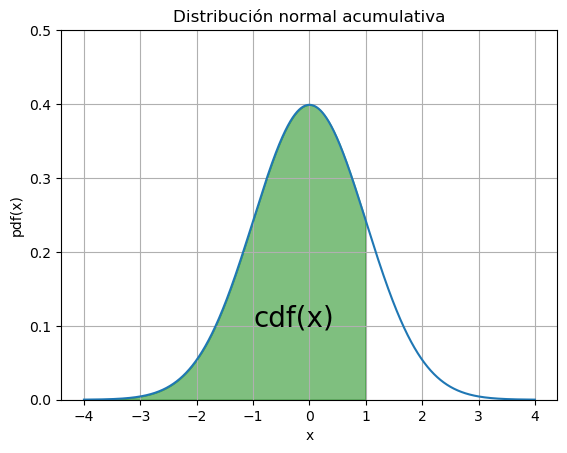

In [107]:
from scipy.stats import norm
fig, ax = plt.subplots()
# for distribution curve
x= np.arange(-4,4,0.001)
ax.plot(x, norm.pdf(x))
ax.set_title("Distribución normal acumulativa")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)
# for fill_between
px=np.arange(-4,1,0.01)
ax.set_ylim(0,0.5)
ax.fill_between(px,norm.pdf(px),alpha=0.5, color='g')
# for text
ax.text(-1,0.1,"cdf(x)", fontsize=20)
plt.show()

### Cálculo de probabilidades de una distribución normal

Calculemos $\text{cdf}(2)=\mathbb{P}(X<2)$ cuando $X\sim N(3,2^2)$.

$$Z = \frac{X-\mu}{\sqrt{\sigma^2}} \sim N(0,1)$$

In [113]:
norm.cdf(x=2, loc=3, scale=2) #v.a. con media=3 y st=2

0.3085375387259869

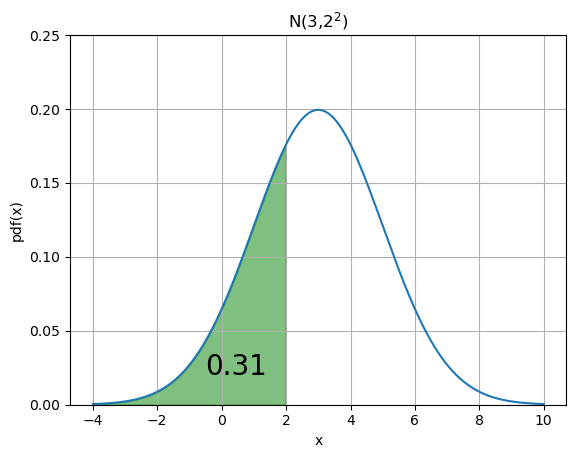

In [115]:
from scipy.stats import norm
fig, ax = plt.subplots()
# for distribution curve
x= np.arange(-4,10,0.001)
ax.plot(x, norm.pdf(x,loc=3,scale=2))
ax.set_title("N(3,$2^2$)")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)
# for fill_between
px=np.arange(-4,2,0.01)
ax.set_ylim(0,0.25)
ax.fill_between(px,norm.pdf(px,loc=3,scale=2),alpha=0.5, color='g')
# for text
ax.text(-0.5,0.02,round(norm.cdf(x=2, loc=3, scale=2),2), fontsize=20)
plt.show()

Calculemos $\mathbb{P}(0.5<𝑋<2)$ cuando $X\sim N(1,2)$.

In [118]:
s=np.sqrt(2)
norm(1, s).cdf(2) - norm(1,s).cdf(0.5)

0.3984131339906417

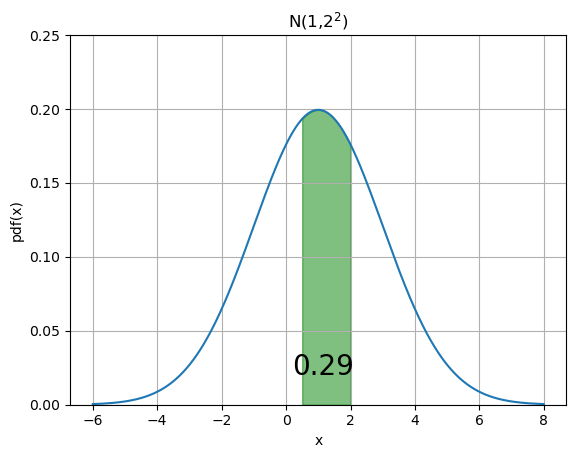

In [120]:
fig, ax = plt.subplots()
x= np.arange(-6,8,0.001)
ax.plot(x, norm.pdf(x,loc=1,scale=2))
ax.set_title("N(1,$2^2$)")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)
px=np.arange(0.5,2,0.01)
ax.set_ylim(0,0.25)
ax.fill_between(px,norm.pdf(px,loc=1,scale=2),alpha=0.5, color='g')
pro=norm(1, 2).cdf(2) - norm(1,2).cdf(0.5)
ax.text(0.2,0.02,round(pro,2), fontsize=20)
plt.show()

**Ejemplo importante** Si $Z\sim N(0,1)$, encuentra $\mathbb{P}(-1.93 < Z < 1.93)$. La probabilidad buscada es:

In [123]:
norm(0,1).cdf(1.93)-norm(0,1).cdf(-1.93)

0.9463931622458901

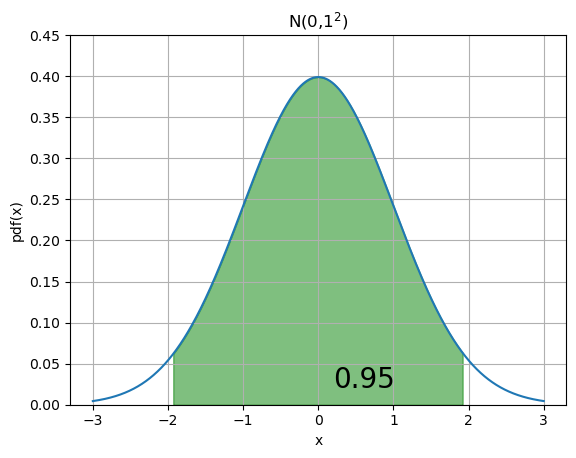

In [125]:
fig, ax = plt.subplots()
# for distribution curve
x= np.arange(-3,3,0.001)
ax.plot(x, norm.pdf(x,loc=0,scale=1))
ax.set_title("N(0,$1^2$)")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)
px=np.arange(-1.93,1.93,0.01)
ax.set_ylim(0,0.45)
ax.fill_between(px,norm.pdf(px,loc=0,scale=1),alpha=0.5, color='g')
pro=norm(0, 1).cdf(1.93) - norm(0,1).cdf(-1.93)
ax.text(0.2,0.02,round(pro,2), fontsize=20)
plt.show()

### Cálculo de probabilidades:
$\mathbb{P}(0<Z<b)$: Queremos calcular $\mathbb{P}(0<Z<0.43)$, lo cuál puede realizarse de la siguiente manera:
* Tablas de área a la derecha: $\mathbb{P}(0<Z<0.43) = 0.1664$

$\mathbb{P}(-b<Z<b)$: Queremos calcular $\mathbb{P}(-0.16<Z<0.16)$, lo cuál puede realizarse de la siguiente manera:
* Tablas de área a la derecha:  $\mathbb{P}(-0.16<Z<0.16) = \mathbb{P}(-0.16<Z<0)+\mathbb{P} (0<Z<0.16) = \mathbb{P}(0<Z<0.16)+\mathbb{P}(0<Z<0.16) = 2\mathbb{P}(0<Z<0.16) = 2(0.0636) = 0.1272$

$\mathbb{P}(Z<-b)$: Queremos calcular $\mathbb{P}(Z<-1.94)$, lo cuál puede realizarse de la siguiente manera:
* Tablas de área a la derecha: $\mathbb{P}(Z<-1.94) = \mathbb{P}(Z<0)+\mathbb{P}(-1.94<Z<0) = \mathbb{P}(Z<0) + \mathbb{P}(0<Z<1.94) = 0.5 - 0.4738 = 0.0262$

$\mathbb{P}(Z>-b)$: Queremos calcular $(Z>-0.07)$, lo cuál puede realizarse de la siguiente manera:
* Tablas de área a la derecha: $\mathbb{P}(Z>-0.07) = \mathbb{P}(-0.07<Z<0) + \mathbb{P}(Z>0) = \mathbb{P}(0<Z<0.07) + \mathbb{P}(Z>0) = 0.0279 + 0.5 = 0.5279$

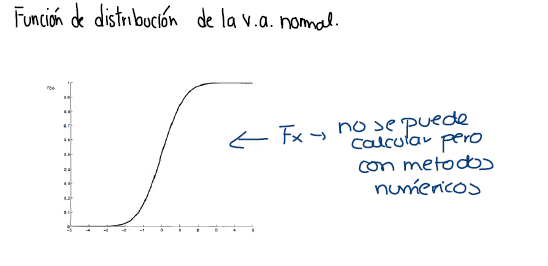

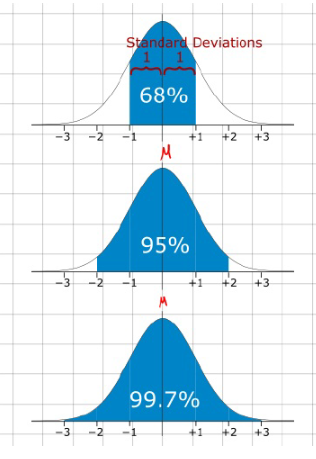

## Variable aleatoria Gamma con parámetros $\alpha$ y $\lambda$.

 La distribución gamma se obtiene al considerar el tiempo que transcurre entre cierto número de ocurrencias de eventos que ocurren aleatoriamente en el tiempo

La función gamma $\Gamma:(0,\infty)\to \mathbb{R}$ está definida como
	$$\Gamma(\alpha)=\int_{0}^{\infty}t^{\alpha-1}e^{-t}dt.$$



*Propiedades de la función gamma*.
- $\Gamma(\alpha)<\infty$ para cualquier $\alpha>0$.
- $\Gamma(\alpha+1)=\alpha\Gamma(\alpha)$.
- Si $n\geq 1$ $\Gamma(n)=(n-1)!$
- $\Gamma\left(\frac{1}{2} \right)=\sqrt{\pi}$.



 Si $\alpha$ y $\lambda$ son reales positivos, decimos que una variable aleatoria $X$ tiene distribución gamma con parámetros $\alpha$ y $\lambda$ si tiene por función de densidad:
	$$\displaystyle f_{X}(x)=\begin{cases}
	\displaystyle \frac{\lambda^{\alpha}x^{\alpha-1}e^{-\lambda x} }{\Gamma(\alpha)} & x>0\\
	0 & \text{en otro caso}
	\end{cases}$$
En esta caso, escribimos la información anterior como $X\sim \Gamma(\alpha,\lambda) $


Ejemplo 1. Una computadora cuántica cuenta con un tipo de aparato de medición, el cual tiene un tiempo de vida que se distribuye exponencialmente, de tal manera que su tiempo promedio de vida es de  $1000$ horas. Si se utilizan $10$ de estos aparatos en forma consecutiva, uno de ellos después de que el anterior ya no funciona. ¿Cuál es la probabilidad de que alguno de los aparatos estará funcionando después de $10,000$ horas?


**Solución.**
Sea $X$ el tiempo total de vida de los $5$ aparatos, usados, como se indica, uno después del otro. Entonces $X\sim \Gamma(10, 0.001)$. Así,
$$\mathbb{P}(X>10000)=\int_{10000}^{\infty}\frac{(0.001)^{10}}{9!}x^{9}e^{-0.001x}dx=0.4579.$$

Ejemplo 2.  Consideremos un call center donde los tiempos entre llamadas son independientes y se distribuyen exponencialmente con una media de 3 minutos. Supongamos que queremos encontrar la probabilidad de que transcurran más de 30 minutos antes de recibir 10 llamadas.


**Solución.**
Sea $X$ el tiempo total para recibir $10$ llamadas. Dado que el tiempo medio entre llamadas es de $3$ minutos. Entonces $X \sim \Gamma(10, \frac{1}{3})$. Así
$$P(X > 30) = \int_{30}^{\infty} \frac{\left(\frac{1}{3}\right)^{10} x^{9} e^{-\frac{x}{3}}}{9!} \, dx = 0.45793.$$

**Nota.** Si $X\sim N(0,1)$, entonces $X^{2}\sim \Gamma\left(\frac{1}{2}, \frac{1}{2} \right)$.
En efecto, Para $z>0$, se tiene:
	$$F_{X^{2}}(z)=\mathbb{P}(X^2\leq z)=\mathbb{P}(-\sqrt{z}\leq X\leq \sqrt{z})=F_{X}(\sqrt{z})-F_{X}(-\sqrt{z}).$$
Por lo tanto,
$$f_{X^2}(z)=\frac{d F_{X^{2}}(z)}{dz}=\frac{1}{2\sqrt{z}}f_{X}(\sqrt{z})+\frac{1}{2\sqrt{z}}f_{X}(-\sqrt{z})=\frac{1}{\sqrt{z}}f_{X}(z).$$
Ahora,
$$f_{X}(\sqrt{z})=\frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}z}.$$


### Esperanza y Varianza

La esperanza, $\text{E}[X]$ para una variable aleatoria $X\sim Γ(\alpha, \lambda)$ es:

$$
\mathbb{E}(X) = \frac{\alpha}{\lambda}
$$
y su varianza es:
$$
\text{Var}(X) = \frac{\alpha}{\lambda^2}
$$



La distribución gamma es esencial en varios campos por su capacidad para modelar tiempos de espera y eventos con tasas constantes. Sus aplicaciones incluyen:

  * $\textbf{Teoría de colas y procesos estocásticos:}$ Modela el tiempo de espera hasta el k-ésimo evento.
  * $\textbf{Confiabilidad y análisis de supervivencia:}$ Utilizada para tiempos de fallo y eventos críticos en medicina.
  * $\textbf{Hidrología y meteorología:}$ Aplica en la modelación de precipitaciones acumuladas y tamaños de gotas.
  * $\textbf{Procesamiento de imágenes y señales:}$ En el ajuste de modelos a datos de intensidades.
  * $\textbf{Finanzas:}$ Para rendimientos de activos que no siguen distribuciones normales.
  * $\textbf{Biología y ecología:}$ Para tasas de crecimiento y tiempos entre eventos biológicos.
  * $\textbf{Física:}$ Describe tiempos de decaimiento y distribuciones de energía.


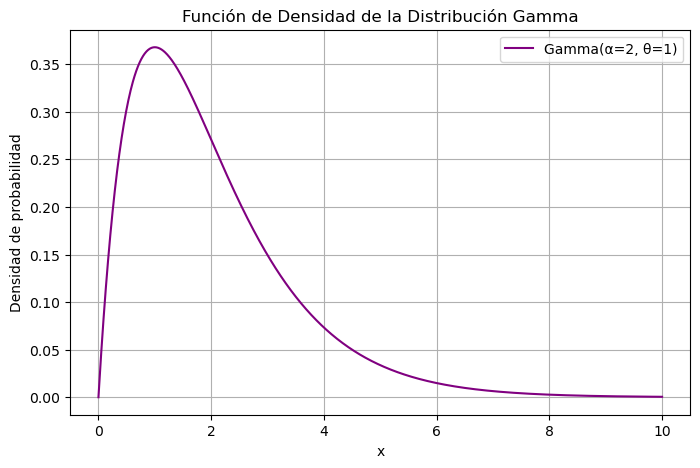

In [133]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

# Parámetros de la distribución Gamma
shape_param = 2  # Parámetro de forma (k o α)
scale_param = 1  # Parámetro de escala (θ)

# Generar valores de x
x = np.linspace(0, 10, 1000)

# Calcular la PDF de la distribución Gamma
gamma_pdf = gamma.pdf(x, a=shape_param, scale=scale_param)

# Graficar la PDF de la distribución Gamma
plt.figure(figsize=(8, 5))
plt.plot(x, gamma_pdf, label=f'Gamma(α={shape_param}, θ={scale_param})', color='purple')
plt.xlabel('x')
plt.ylabel('Densidad de probabilidad')
plt.title('Función de Densidad de la Distribución Gamma')
plt.grid(True)
plt.legend()
plt.show()

- Si $\alpha = 1$, $\lambda > 0 \Rightarrow$ v.a. exponencial.

- Si $\lambda = \frac{1}{2}$, $\alpha = \frac{k}{2}$, $k \in \mathbb{Z}^{+} \Rightarrow$ ji-cuadrada.

- Si $\lambda > 1$ y $\alpha > 1 \Rightarrow$ Erlang $\Rightarrow$ aplicaciones.

**Ejemplo** Sea $X \sim \mathcal{N}(0,1)$. Demostrar que $ X^2 $ tiene una distribución gamma.

**Solución:** Para $z \geq 0$, se tiene que:

$$
\begin{align*}
F_{X^2}(z) &= P(X^2 \leq z) = P(-\sqrt{z} \leq X \leq \sqrt{z}) \\
&= F_X(\sqrt{z}) - F_X(-\sqrt{z}) \\
\end{align*}
$$
Derivando, obtenemos la función de densidad:

$$ f_{X^2}(z) = \frac{d}{dz} F_{X^2}(z) = \frac{1}{2\sqrt{z}} f_X(\sqrt{z}) + \frac{1}{2\sqrt{z}} f_X(-\sqrt{z}) $$

Como la densidad de $X$ es simétrica, se tiene que 

$$ f_{X^2}(z) = \frac{1}{\sqrt{2\pi}} e^{-z/2} \frac{1}{2\sqrt{z}} = \frac{(1/2)^{1/2} z^{-1/2} e^{-z/2}}{\Gamma(1/2)}  \sim Gamma\left(\frac{1}{2}, \frac{1}{2}\right) $$

## Variable aleatoria Beta con parámetros $\alpha$ y $\beta$.


La distribución beta es una familia de distribuciones de probabilidad continua definida en el intervalo [0, 1]. Es particularmente útil para modelar variables que representan proporciones y porcentajes.

La función beta, $B(\alpha, \beta)$, se define como:

$$
B(\alpha, \beta) = \int_0^1 t^{\alpha-1}(1-t)^{\beta-1} dt = \frac{\Gamma(\alpha) \Gamma(\beta)}{\Gamma(\alpha + \beta)}
$$

La función de densidad de probabilidad de la distribución beta se expresa como:

$$
f_X(x) = \frac{x^{\alpha-1}(1-x)^{\beta-1}}{B(\alpha, \beta)},
$$
con $x\in (0,1)$.

**Notación.** $X\sim \text{Beta}(\alpha, \beta)$.



### Esperanza y Varianza
Si $X\sim \text{Beta}(\alpha, \beta)$, entonces
  $$\mathbb{E}[X] = \frac{\alpha}{\alpha + \beta}$$
y
  $$\text{Var}(X) = \frac{\alpha \beta}{(\alpha + \beta)^2 (\alpha + \beta + 1)}.$$





**Ejemplo.** Supongamos que un análisis sugiere que una nueva inversión tiene una alta probabilidad de éxito. Usando una distribución beta con $\alpha = 5$ y $\beta = 1$, entonces:

$$
f_{X}(x) = 5x^4, \quad \mathbb{E}[X] = \frac{5}{6}, \quad \text{Var}(X) = \frac{5}{252}
$$


**Aplicaciones en la Vida Real**

La distribución beta se utiliza en una variedad de campos, incluyendo:
- Finanzas: para modelar la variabilidad en tasas de retorno de inversiones.
- Mercadotecnia: para analizar proporciones de respuesta de consumidores.
- Ciencias de la salud: en la evaluación de la efectividad de tratamientos médicos.
- Ecología: para estimar proporciones en estudios de biodiversidad.

# ----------------------------------
# 1.3 Simulación de variables aletaorias
# -----------------------------------

Daremos recopilación de métodos para generar variables aleatorias utilizados en simulación computacional. Se abordan distribuciones uniformes, exponenciales, normales, binomiales y Poisson, entre otras, así como técnicas como la transformada inversa y el método del rechazo.

Ejemplos comunes en simulación:
- Tiempo entre llegada de cada persona  
- Número de personas por minuto  
- Número de artículos por persona  
- Cantidad de dinero ganado cada hora  
- Tiempo de atención por cliente  
- Número de veces que la cajera solicita ayuda durante la jornada  
- Cantidad de gente que está formada  
- Número de personas que pagan con tarjeta

## Métodos de generación de números aleatorios rectangulares

La generación de variables aleatorias con esta distribución es importante porque las variables que tengan una distribución diferente, tendrán que usar a ésta como base.

- Cada posible resultado entre $a$ y $b$ tiene la misma probabilidad $1/n$.

Las variables generadas deben cumplir con:
- Los valores generados deben ser independientes y estar idénticamente distribuidos
- La secuencia generada debe ser lo más larga posible y ser reproducibles
- Debe permitir generar múltiples secuencias
- Que usen poca memoria

Históricamente se han usado cuatro tipos de métodos para generar sucesiones de números rectangulares:
- Métodos manuales
- Tablas de biblioteca
- Computación analógica
- Computación digital

### Generación pseudoaleatoria

La generación de los números aleatorios rectangulares debe realizarse a través de relaciones matemáticas de recurrencia. Por esta razón se consideran **pseudoaleatorios**, ya que el proceso para generarlos es determinístico.

Hay dos métodos que son los más utilizados para la generación. Ambos se basan en la siguiente definición:

**Definición.** Dos enteros $a$ y $b$ son congruentes módulo $m$ si su diferencia es un múltiplo entero de $m$ y se expresa como
$$𝑎 \equiv 𝑏 ( \text{𝑚o𝑑 } 𝑚)$$
Como consecuencia:
- $(a-b)$ es divisible entre $m$
- $a$ y $b$ dan el mismo residuo al ser divididos entre $m$


#### Método congruencial multiplicativo

Generar una secuencia de números pseudoaleatorios uniformes en el intervalo (0, 1) usando la siguiente fórmula recursiva:

$$n_{i+1} = a n_i \mod m$$
- $m$ debe ser tan grande como sea posible, dependiendo de los bits por palabra que maneje la computadora, descontando el bit del signo ($b$). Por lo tanto: $m = 2^b$
- $a$ debe satisfacer que $a \approx 2^{(b+1)/2}$ y que $a \equiv \pm 3 \mod 8$. La segunda expresión equivale a $( a-(\pm3 ) )$ es múltiplo de $8$.
- $n_0$: entero positivo impar menor a $m$
- El periodo será de longitud: $m/4$

In [25]:
# n0 : valor inicial o semilla
# a : multiplicador
# m : modulo (2^b)
# n : el número de numeros que quiero generar

def multiplicativo(n0,a,m,n):
    secuencia = []
    ni = n0 # iniciar con una semilla
    for _ in range(n):
        ni = (a * ni) % m # calculo el sig numero utilizando la formula recurrente
        secuencia.append(ni/m) # normaliza entre 0 y 1
    return secuencia

In [27]:
m = 2**31
a = 65539 # a ≡  +-3 mod 8
n0 = 12345
n=10

secuencia_mult = multiplicativo(n0,a,m,n)
print(secuencia_mult)

[0.37675674771890044, 0.2604887490160763, 0.17212176462635398, 0.6883318466134369, 0.5808951980434358, 0.29038456873968244, 0.5142506300471723, 0.4720426616258919, 0.20400029933080077, 0.9756178413517773]


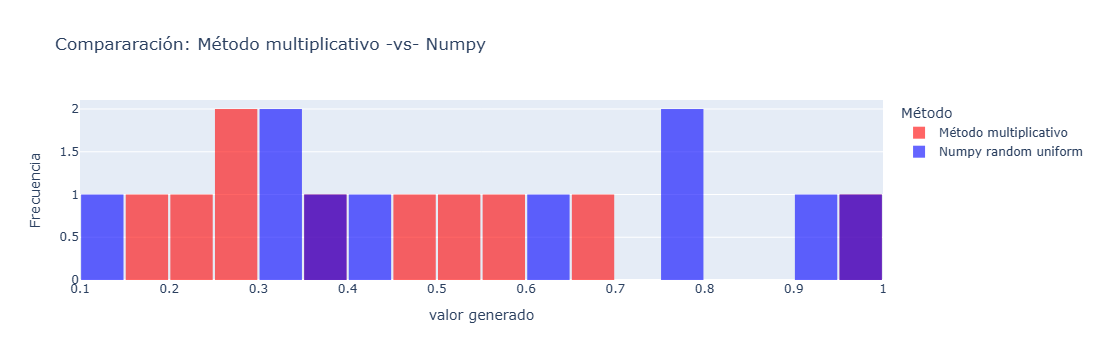

In [29]:
import numpy as np
import plotly.graph_objects as go # Para gráficos interactivos

# Generamos ambas secuencias
secuencia_mult = multiplicativo(n0,a,m,n)
secuencia_numpy = np.random.uniform(0,1,n)

# figura con Plotly
fig = go.Figure()

# Añadir los histogramas
fig.add_trace(go.Histogram(
    x=secuencia_mult,
    nbinsx = 40,
    opacity = 0.6,
    name = 'Método multiplicativo',
    marker_color='red'
))

fig.add_trace(go.Histogram(
    x=secuencia_numpy,
    nbinsx = 40,
    opacity = 0.6,
    name = 'Numpy random uniform',
    marker_color='blue'
))

fig.update_layout(
    barmode='overlay', #superpone los histogramas
    title = 'Compararación: Método multiplicativo -vs- Numpy',
    xaxis_title='valor generado',
    yaxis_title='Frecuencia',
    legend_title='Método',
    bargap=0.05
)

fig.show()

#### Método congruencial mixto

Este método genera números pseudoaleatorios con la fórmula:
$$n_{i+1} = (a n_i + c) \mod m$$

**Obs.** Se le llama “mixto” porque incluye una constante adicional $c$ (a diferencia del método multiplicativo).

- $m = 2^b$
- $a \approx 2^{(b-1)/2}$, $a \equiv 1 \mod 4$
- $c$, $n_0$: enteros positivos impares $< m$
- Periodo: $m$

In [34]:
# n0 : valor inicial o semilla
# a : multiplicador
# c : deber ser impar
# m : modulo (2^b)
# n : el número de numeros que quiero generar

def mixto(n0,a,c,m,n):
    secuencia = []
    ni = n0 # iniciar con una semilla
    for _ in range(n):
        ni = (a * ni + c) % m # calculo el sig numero utilizando la formula recurrente
        secuencia.append(ni/m) # normaliza entre 0 y 1
    return secuencia

In [36]:
m = 2**31
a = 1103515245 # a cong 1 mod----
c = 12345
n0 = 42
n= 10

secuencia_mixto = mixto(n0,a,c,m,n)
print(secuencia_mixto)

[0.5823075897060335, 0.5198187492787838, 0.46597642498090863, 0.7770372582599521, 0.42286502895876765, 0.03337232954800129, 0.41738913068547845, 0.8087285170331597, 0.6123396842740476, 0.7149040475487709]


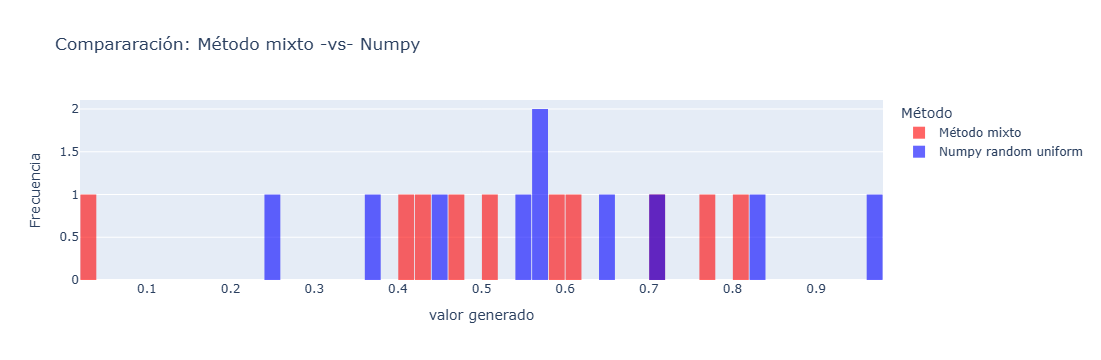

In [38]:
# Generamos ambas secuencias
secuencia_mixto = mixto(n0,a,c,m,n)
secuencia_numpy = np.random.uniform(0,1,n)

# figura con Plotly
fig = go.Figure()

# Añadir los histogramas
fig.add_trace(go.Histogram(
    x=secuencia_mixto,
    nbinsx = 40,
    opacity = 0.6,
    name = 'Método mixto',
    marker_color='red'
))

fig.add_trace(go.Histogram(
    x=secuencia_numpy,
    nbinsx = 40,
    opacity = 0.6,
    name = 'Numpy random uniform',
    marker_color='blue'
))

fig.update_layout(
    barmode='overlay', #superpone los histogramas
    title = 'Compararación: Método mixto -vs- Numpy',
    xaxis_title='valor generado',
    yaxis_title='Frecuencia',
    legend_title='Método',
    bargap=0.05
)

fig.show()

| **Método**     | **Fórmula**                            | **Ventajas**                                          | **Riesgos / Limitaciones**                                |
|----------------|----------------------------------------|-------------------------------------------------------|------------------------------------------------------------|
| Multiplicativo | \( n_{i+1} = a n_i \mod m \)           | Rápido, menos memoria                                 | Menor aleatoriedad, requiere \( a, m, n_0 \) bien elegidos |
| Mixto          | \( n_{i+1} = (a n_i + c) \mod m \)     | Mejor distribución, periodo completo posible          | Más complejo, pero más robusto                             |
| NumPy (`uniform`) | Motor moderno y validado           | Alta calidad, probado, rápido                         | Caja negra, sin control del generador interno              |


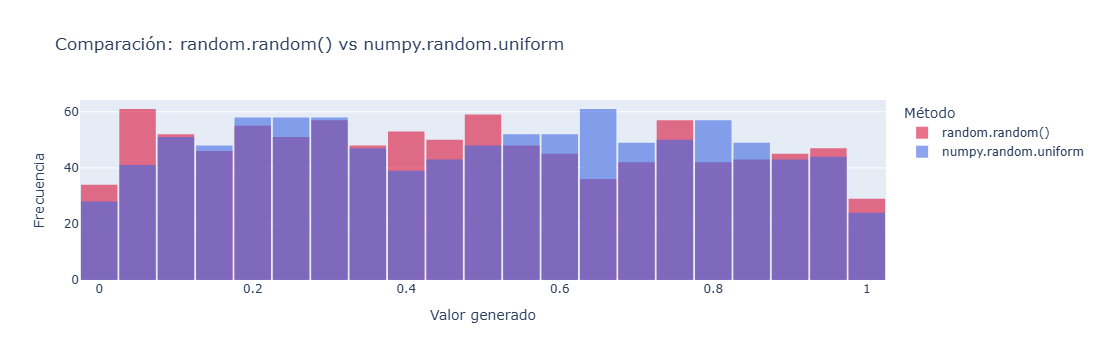

In [41]:
import random
n = 1000

# Generar secuencia usando random.random()
secuencia_random = [random.random() for _ in range(n)]

# Generar secuencia usando numpy
secuencia_numpy = np.random.uniform(0, 1, n)

# Graficar histogramas
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=secuencia_random,
    nbinsx=40,
    opacity=0.6,
    name='random.random()',
    marker_color='crimson'
))

fig.add_trace(go.Histogram(
    x=secuencia_numpy,
    nbinsx=40,
    opacity=0.6,
    name='numpy.random.uniform',
    marker_color='royalblue'
))

fig.update_layout(
    barmode='overlay',
    title='Comparación: random.random() vs numpy.random.uniform',
    xaxis_title='Valor generado',
    yaxis_title='Frecuencia',
    legend_title='Método',
    bargap=0.05
)

fig.show()

## Metodos de generación de numeros aleatorios no rectangulares

#### Método de la transformada inversa

El método utiliza la función de distribución $F(x)$ de la distribución que se va a simular
$$F(x) = \int_{-\infty}^{x} f(t)\,dt$$

Como se sabe, los valores de $F(x)$ están en el intervalo $(0,1)$ al igual que los números rectangulares $U$.

El método genera un $U$ y trata de determinar el valor de la variable aleatoria para la cual $F(x)$ sea igual a $U$.

Si $U \in (0,1)$:
$$ F(x) = U \quad \Rightarrow \quad x = F^{-1}(U)$$

$\mathbf{Teorema}.$ Sea $X$ una variable aleatoria real. Supongamos que su función de distribución $F$ es estrictamente creciente (por lo que $F$ es una biyección de $\mathbb{R}$ sobre $(0,1)$ y podemos denotar por $F^{-1}$ a su inversa). Sea $U\sim \text{unif}[0,1]$. Entonces $F^{-1}(U)$ tiene la misma ley que $X$.

Si $F$ no es estrictamente creciente, hemos visto que el teorema precedente sigue siendo válido bajo la condición de definir
$$F^{-1}(u)=\inf\{ x\in \mathbb{R} : F(x)\geq u\},$$
la inversa generalizada de $F$.

In [50]:
# Vamos a simular una v.a. Bernoulli usando una Uniforme
import random
def bernoulli(p):
    u = random.random() # U -> Unif(0,1)
    return 1 if u <= p else 0

In [52]:
# Simulamos n valores con p de éxito
p = 0.5
simulaciones = [bernoulli(p) for _ in range(100)]
print(simulaciones)

[1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0]


In [54]:
sum(simulaciones)

52

## Ejemplo: Distribución exponencial

sea $\theta,\lambda>0$, entonces a través del teorema se puede generar una v.a. exponencial.

Sea $U \sim Unif[0,1]$, entonces si $X\sim Exp(\lambda)$, entonces

$$f_{X}(x) = \lambda e^{-\lambda x}$$
y que
$$ F_X(x) = 1-e^{-\lambda x} $$

Sabemos que $1-e^{-\lambda x} = U$, entonces $1-U = e^{-\lambda x}$, y tomando logaritmo, se tiene que
$ \ln(1-U) = -\lambda x$ y como $U$ es uniforme entonces $U \sim 1-U$, por lo que depejando a $x$, se tiene que
$$ X = -\frac{\ln(U)}{\lambda} \sim Exp(\lambda) $$

## Ejemplo: Distribución Uniforme Continua
$$f(x) = \frac{1}{b-a}, \quad a \leq x \leq b$$
$$F(x) = \frac{x-a}{b-a} = U \Rightarrow x = a + (b-a)U$$

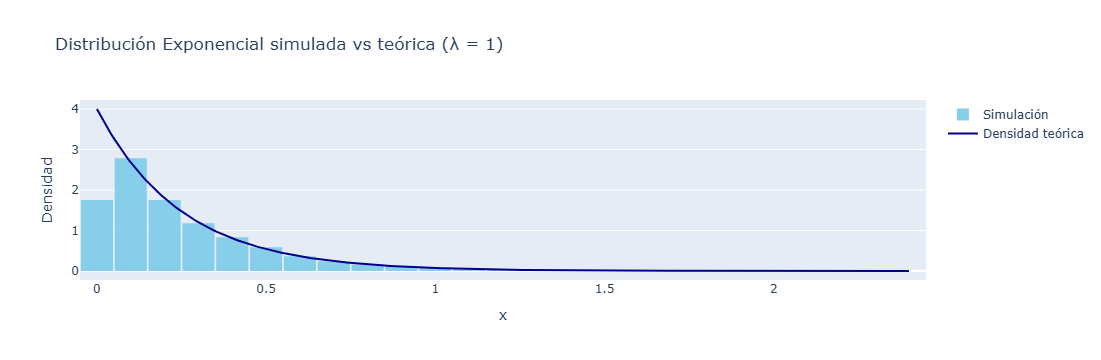

In [58]:
import numpy as np
import plotly.graph_objects as go

# Semilla
np.random.seed(123)

# Parámetro de la exponencial
lambd = 4
n = 10000

# Simulación usando transformada inversa
uniformes = np.random.random(n)
exponenciales = -np.log(uniformes) / lambd

# Curva teórica
x_vals = np.linspace(0, exponenciales.max(), 300)
y_vals = lambd * np.exp(-lambd * x_vals)

# Gráfico
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=exponenciales,
    nbinsx=40,
    histnorm='probability density',
    marker_color='skyblue',
    name='Simulación'
))

fig.add_trace(go.Scatter(
    x=x_vals,
    y=y_vals,
    mode='lines',
    name='Densidad teórica',
    line=dict(color='darkblue')
))

fig.update_layout(
    title='Distribución Exponencial simulada vs teórica (λ = 1)',
    xaxis_title='x',
    yaxis_title='Densidad',
    bargap=0.05
)

fig.show()

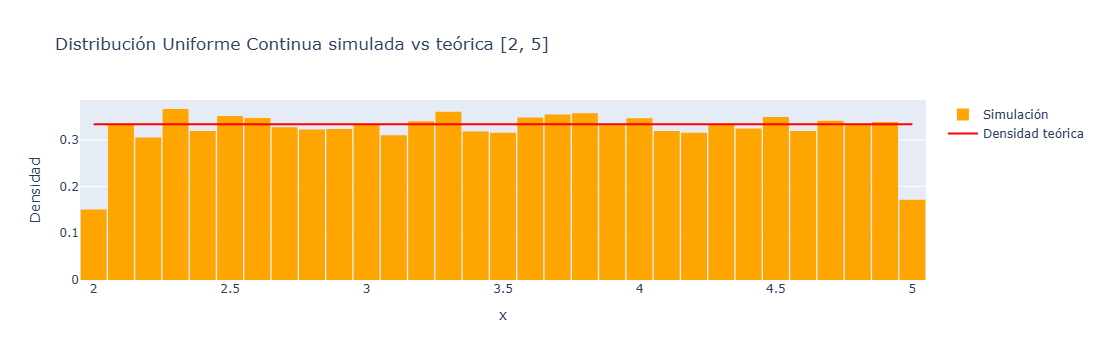

In [60]:
# Parámetros de la uniforme
a, b = 2, 5
n = 10000

# Simulación por transformación lineal
uniformes = np.random.random(n)
uniforme_continua = a + (b - a) * uniformes

# Densidad teórica (constante)
x_vals = np.linspace(a, b, 300)
y_vals = np.ones_like(x_vals) * (1 / (b - a))

# Gráfico
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=uniforme_continua,
    nbinsx=40,
    histnorm='probability density',
    marker_color='orange',
    name='Simulación'
))

fig.add_trace(go.Scatter(
    x=x_vals,
    y=y_vals,
    mode='lines',
    name='Densidad teórica',
    line=dict(color='red')
))

fig.update_layout(
    title='Distribución Uniforme Continua simulada vs teórica [2, 5]',
    xaxis_title='x',
    yaxis_title='Densidad',
    bargap=0.05
)

fig.show()


### Ejercicio (Tarea)

$\mathbf{Ejemplo}$ (Variable aleatoria Cauchy) Simulemos la variable aleatoria de Cauchy de parámetro $1$ que tiene por función de densidad
$$f(x) = \frac{1}{\pi}\frac{1}{1+x^{2}}.$$

Ejercicio:

a) Corroborar que la función así definida es una función de densidad de probabilidad

b) Encontrar F_X

c) Crear una gráfica en Python que muestre su forma

d) Generar v.a. Cauchy a partir de una uniforme

Por el teorema anterior, para $u\in (0,1)$

$$u=\frac{1}{\pi}\arctan(x)+\frac{1}{2} \qquad \text{si y sólo si} \qquad x=\tan\left({\pi}\left(u-\frac{1}{2} \right) \right).$$

Solución a)
Recordemos que se deben de cumplir dos cosas:

i) No negativa. $f(x)≥0$ para todo $x \in \mathbb{R}$.

ii) $\int_{-\infty}^{\infty} f(x)\,dx = 1$

Solución i) Notemos que $x^2>0$ para todo $x \in \mathbb{R}$, así $\frac{1}{1+x^{2}}>0$ por lo tanto $f(x)>0$ para todo $x \in \mathbb{R}$

Solución ii)

$\int_{-\infty}^{\infty} \frac{1}{\pi}\frac{1}{1+x^{2}} \, dx = \frac{1}{\pi} \int_{-\infty}^{\infty} \frac{1}{1+x^{2}} \, dx = \frac{\text{arcTan}(x)}{\pi}|_{-\infty}^{\infty} = 1$

Solución b)

$$F(x) = \int_{-\infty}^{x} f(t)\,dt =
\int_{-\infty}^{x} \frac{1}{\pi}\frac{1}{1+t^{2}} \,dt =
\frac{1}{\pi} \int_{-\infty}^{x} \frac{1}{1+t^{2}} \, dt =
\frac{\text{arcTan}(t)}{\pi}|_{-\infty}^{x} =
\frac{\text{arcTan}(x)}{\pi} - \frac{\text{arcTan}(-∞)}{\pi} =
\frac{\text{arcTan}(x)}{\pi} - \frac{-\pi}{2 \pi} =
\frac{1}{\pi} \text{arcTan}(x) + \frac{\pi}{2}
$$


Así

$$ F(x) = \frac{1}{\pi} \text{arcTan}(x) + \frac{\pi}{2} $$

c) Crear una gráfica en Python que muestre su forma

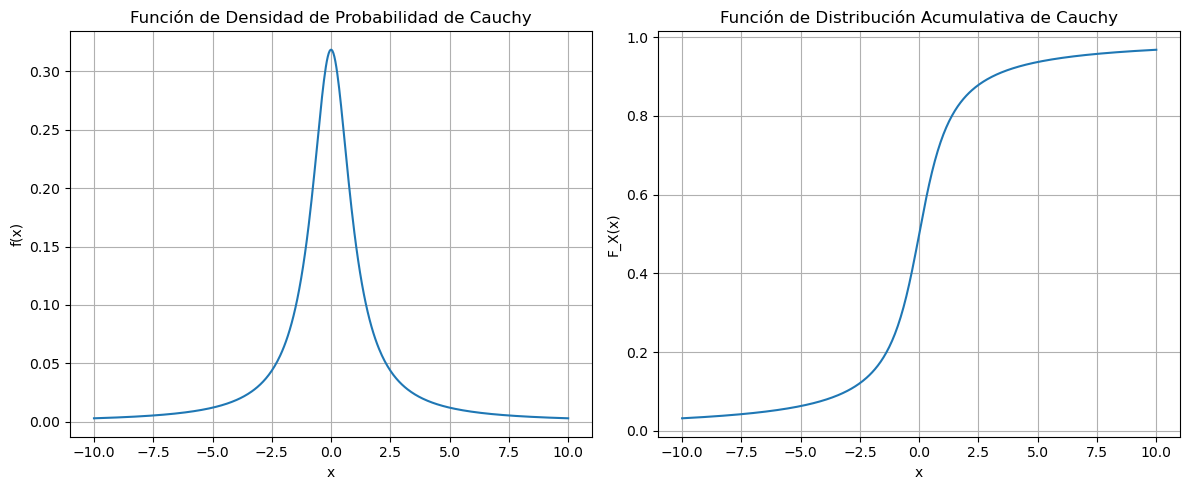

In [68]:
import numpy as np
import matplotlib.pyplot as plt

# Definir el rango de valores para x
x = np.linspace(-10, 10, 500)

# Definir la función de densidad de probabilidad de Cauchy
def cauchy_pdf(x):
    return 1 / (np.pi * (1 + x**2))

# Calcular los valores de la PDF
pdf_values = cauchy_pdf(x)

plt.figure(figsize=(12, 5))  # Ajustar el tamaño de la figura para dos subgráficos
plt.subplot(1, 2, 1)

plt.plot(x, pdf_values, label='Función de Densidad de Cauchy')
plt.title('Función de Densidad de Probabilidad de Cauchy')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)


# Graficar la CDF
def cauchy_cdf(x):
    return (1 / np.pi) * np.arctan(x) + 0.5

cdf_values = cauchy_cdf(x)

plt.subplot(1, 2, 2)
plt.plot(x, cdf_values, label='Función de Distribución Acumulativa de Cauchy')
plt.title('Función de Distribución Acumulativa de Cauchy')
plt.xlabel('x')
plt.ylabel('F_X(x)')
plt.grid(True)
plt.tight_layout()  # Ajusta el espaciado entre subgráficos
plt.show()


d) Generar variable aleatoria Cauchy a partir de una uniforme

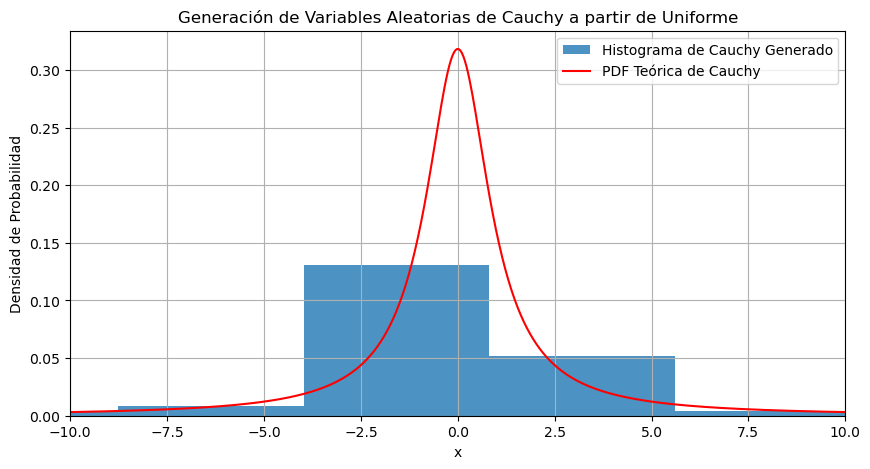

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# Generar números aleatorios uniformes en (0, 1)

num_samples = 1000
uniform_samples = np.random.uniform(0, 1, num_samples)

# Generar variables aleatorias de Cauchy utilizando la transformada inversa
cauchy_generated = np.tan(np.pi * (uniform_samples - 0.5))

# Graficar el histograma de las variables aleatorias de Cauchy generadas
plt.figure(figsize=(10, 5))
plt.hist(cauchy_generated, bins=500, density=True, alpha=0.8, label='Histograma de Cauchy Generado')

# Superponer la función de densidad de probabilidad teórica de Cauchy
x_range = np.linspace(-10, 10, 500)
pdf_theoretical = cauchy_pdf(x_range)

plt.plot(x_range, pdf_theoretical, 'r-', label='PDF Teórica de Cauchy')

plt.title('Generación de Variables Aleatorias de Cauchy a partir de Uniforme')
plt.xlabel('x')
plt.ylabel('Densidad de Probabilidad')
plt.xlim(-10, 10)
plt.legend()
plt.grid(True)
plt.show()

# -------------------------------
# Anexo El problema de Monty Hall
# ------------------------------

 El problema de Monty Hall

Es un famoso dilema de probabilidad basado en un concurso de televisión, y es un gran ejemplo de cómo las intuiciones humanas pueden ser engañosas en contextos probabilísticos.

## Planteamiento del problema:

Tienes tres puertas enfrente de ti. Detrás de una de ellas hay un coche (el premio), y detrás de las otras dos hay cabras (premios no deseados).

Tu elección inicial: Eliges una puerta, pero no la abres aún.

Monty Hall (el presentador, que sabe qué hay detrás de cada puerta) abre una de las otras dos puertas, revelando una cabra.

Segunda oportunidad: Ahora Monty te da la opción de cambiar de puerta (de tu elección original a la otra puerta que queda cerrada) o quedarte con tu elección inicial.

**¿Qué deberías hacer? ¿Cambiar de puerta o quedarte con tu elección original?**

* Respuesta correcta: Deberías cambiar de puerta.
* Explicación: Inicialmente, al elegir una puerta, tienes una probabilidad de $1/3$ de haber elegido el coche y una probabilidad de $2/3$ de haber elegido una cabra.

Cuando Monty abre una puerta revelando una cabra, no cambia estas probabilidades. Al principio tenías un 2/3 de probabilidades de haber elegido mal, y Monty, al mostrar una cabra, te está ayudando a confirmar que el coche probablemente está detrás de la otra puerta.

Si elegiste mal inicialmente (lo cual sucede en el 66.67% de los casos), Monty te da la oportunidad de corregir tu elección cambiando a la puerta correcta.

Si elegiste correctamente desde el principio (probabilidad del 33.33%), entonces cambiar haría que perdieras.

Por lo tanto, cambiar de puerta te da una probabilidad de ganar de $2/3$, mientras que quedarte con tu elección original te deja con solo una probabilidad de ganar de $1/3$.

**Ejemplo:**

* Puertas: [1, 2, 3]
* El coche está detrás de la puerta 2.
* Si eliges la puerta 1 (probabilidad $1/3$), Monty abre la puerta 3, que tiene una cabra.
* Si cambias a la puerta 2, ganas el coche (probabilidad $2/3$).

## Implementación en Python

El siguiente código simula el famoso problema de Monty Hall en tres escenarios distintos:

* Mantener la elección inicial (no cambiar de puerta).
* Cambiar siempre de puerta.
* Elegir de manera aleatoria entre mantener o cambiar.

1.- Generar el juego
La función generate_game(n) crea un conjunto de juegos. Cada juego tiene 3 puertas, una de ellas con un premio (el coche) y las otras dos con una cabra.

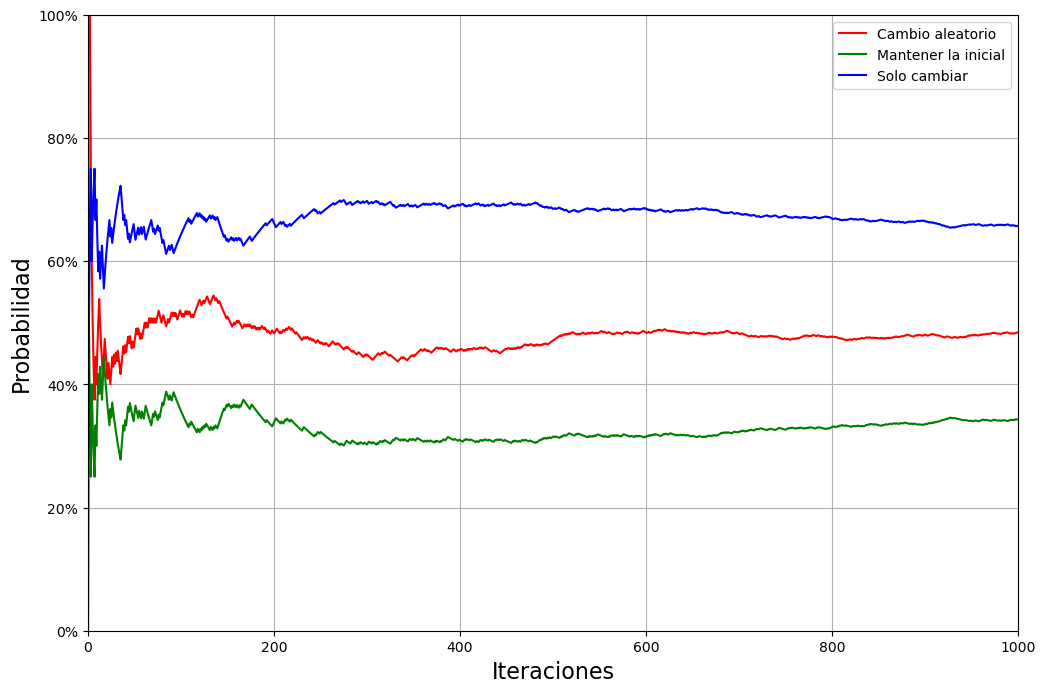

In [206]:
from random import randint
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


# Esta función generará rondas aleatorias para nuestro juego. Cada ronda consta de 3 puertas. Solo una de las puertas es correcta, las otras dos son incorrectas.
# Esta función genera un conjunto de n juegos, cada uno con tres puertas, y solo una contiene el coche.

def generate_game(n: int):
    game = []

    for _ in range(n):
        doors = [False] * 3 # Inicializa 3 puertas como "falsas", indicando que no tienen el premio.
        winner = randint(0, 2) # Escoge aleatoriamente cuál puerta tiene el coche (premio).
        doors[winner] = True  # La puerta seleccionada se marca como True (es la puerta ganadora).
        game.append(doors) # Añade este set de puertas al juego.

    return game


# Esta es una función auxiliar que toma una lista de 3 puertas, examina la segunda y la tercera puerta y luego abre la que tiene una cabra (es decir, la puerta equivocada).
#Esto simula un host con conocimiento de lo que hay detrás de las puertas.
def reveal_goat(doors):
    # Get from doors 2 and 3 the one which contains goat.
    for i in range(1, 3): # Revisa solo las puertas 2 y 3, porque la puerta 1 es la que elige inicialmente el jugador.
        if doors[i] == False: # Si la puerta no contiene el coche.
            return i  # Devuelve el índice de la puerta con cabra.


# ***Simular una elección aleatoria**
#
# Simular una situación en la que el jugador elige aleatoriamente si desea mantener su elección inicial o cambiarla.

def simulate_random_choice(game: list): #El jugador decide al azar si cambia o no después de que Monty revele una cabra.
    wins = 0
    attempts = 0

    history = []

    for doors in game:
        attempts += 1

        #Monty revela una cabra.
        goat = reveal_goat(doors)

        # El jugador decide aleatoriamente si cambiar o no.
        new_choice = randint(0, 1)
        final_choice = 0 if new_choice == 0 else 2 if goat == 1 else 1 # Calcula la nueva elección

        if (doors[final_choice] == True): #Si la elección es correcta, suma un win
            wins += 1

        history.append(wins / attempts) # Añade el ratio de victorias hasta el momento.

    return wins, history


# **Simular elección inicial**
#
# Simular una situación en la que el jugador *solo* conserva su elección inicial y nunca cambia

def simulate_keep_choice(game: list): #El jugador nunca cambia de puerta.
    wins = 0
    attempts = 0
    history = []

    for doors in game:
        attempts += 1

        # User does not switch game.
        if (doors[0] == True):  # Si la primera puerta (la inicial) tiene el coche, suma un win.
            wins += 1

        history.append(wins / attempts)  # Registra el ratio de victorias.

    return wins, history


# **Simular elección de cambio**
#
# Simular una situación en la que el jugador cambia su elección cada vez.

# El jugador cambia de puerta siempre después de que Monty revele una cabra.

def simulate_switch_choice(game: list):
    wins = 0
    attempts = 0
    history = []

    for doors in game:
        attempts += 1

        # Monty revela una cabra.
        goat = reveal_goat(doors)

        # Player switches his doors (here he chooses the non-opened doors).
        new_choice = 1 if goat == 2 else 2 # El jugador cambia a la otra puerta no abierta.

        if (doors[new_choice] == True): # Si la nueva elección es correcta, suma un win.
            wins += 1

        history.append(wins / attempts) # Registra el ratio de victorias.


    return wins, history


# Ahora comienza el cálculo, que genera $n$ juegos aleatorios para la simulación.

# El código genera un conjunto de 1000 juegos y ejecuta las tres simulaciones:
game = generate_game(1000)


# Ejecute las tres simulaciones definidas anteriormente para el juego generado.

wins_random, history_random = simulate_random_choice(game)
wins_keep, history_keep = simulate_keep_choice(game)
wins_switch, history_switch = simulate_switch_choice(game)


# Y por último, crea un gráfico para que podamos ver el resultado.
plt.figure(figsize=(12,8))
plt.plot(history_random, 'r', label="Cambio aleatorio")
plt.plot(history_keep, 'g', label="Mantener la inicial")
plt.plot(history_switch, 'b', label="Solo cambiar")
plt.legend(loc='upper right')
plt.ylim(0, 1.0)
plt.xlim(0, 1000)
plt.ylabel("Probabilidad", fontsize=16)
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1.0))
plt.xlabel("Iteraciones", fontsize=16)
plt.grid(True)
plt.show()

Se visualiza cómo cambian las probabilidades de éxito para las dos estrategias principales: mantener la elección inicial y cambiar de puerta.

# --------------------------------
## 2.4 FGM y FC
# ---------------------------------------

## Función Generadora de Momentos


Si $Y$ es una variable aleatoria continua, entonces la función generadora de momentos de $Y$ está dada por:
$
m(t) = \mathbb{E}(e^{tY}).$
Se dice que existe la función generadora de momentos si existe una constante $b > 0$ tal que $m(t)$ es finita para $|t| \leq b$. (Mendenhall,)

Las propiedades que posee la f.g.m. la hacen una herramienta muy atractiva para resolver algunos problemas de probabilidad. Sin embargo, se debe
señalar que no todas las variables aleatorias tienen asociada una función generadora de momentos



Ejemplo



La función generadora de momentos está definida como:
$
m(t) = \mathbb{E}(e^{tY}) = \int_{0}^{\infty} e^{ty} f_Y(y) \, dy
$

La función de densidad para una variable aleatoria Gamma con parámetros $\alpha > 0$ y $\lambda > 0$ es:
$
f_Y(y) = \frac{\lambda^\alpha}{\Gamma(\alpha)} y^{\alpha - 1} e^{-\lambda y}, \quad y > 0
$

Entonces:
$
m(t) = \int_0^\infty e^{ty} \cdot \frac{\lambda^\alpha}{\Gamma(\alpha)} y^{\alpha - 1} e^{-\lambda y} \, dy
= \frac{\lambda^\alpha}{\Gamma(\alpha)} \int_0^\infty y^{\alpha - 1} e^{-(\lambda - t)y} \, dy
$

Esa integral es la forma de la función Gamma evaluada en el parámetro $\lambda - t$, por lo tanto:
$
m(t) = \left( \frac{\lambda}{\lambda - t} \right)^{\alpha}, \quad \text{para } t < \lambda
$


# ------------------------------------------
## 2.5 Teorema de los grandes números (LGN)
# --------------------------------------------

El teorema conocido como la ley de los grandes números es un resultado muy interesante que puede observarse en la naturaleza. Constituye uno de
los resultados más importantes de la teoría de la probabilidad y tiene mucha relevancia en las aplicaciones tanto teóricas como prácticas.

Este teorema establece que, bajo ciertas condiciones, el promedio aritmético de variables aleatorias converge a una constante cuando el número de sumandos crece a infinito. 

Ley de los grandes números
Sea $X_1, X_2, \dots$ una sucesión infinita de variables aleatorias independientes e idénticamente distribuidas con media finita $\mu$. Entonces, cuando $n \to \infty$,
$
\frac{1}{n} \sum_{i=1}^{n} X_i \longrightarrow \mu,$
en donde la convergencia se verifica en el sentido casi seguro (ley fuerte) y también en probabilidad (ley débil). (Mendenhal,..)




In [ ]:
# Ejemplo para ilustrar la ley de los grandes números para una Ber(p) con p=1/2. (Rincón,2014)

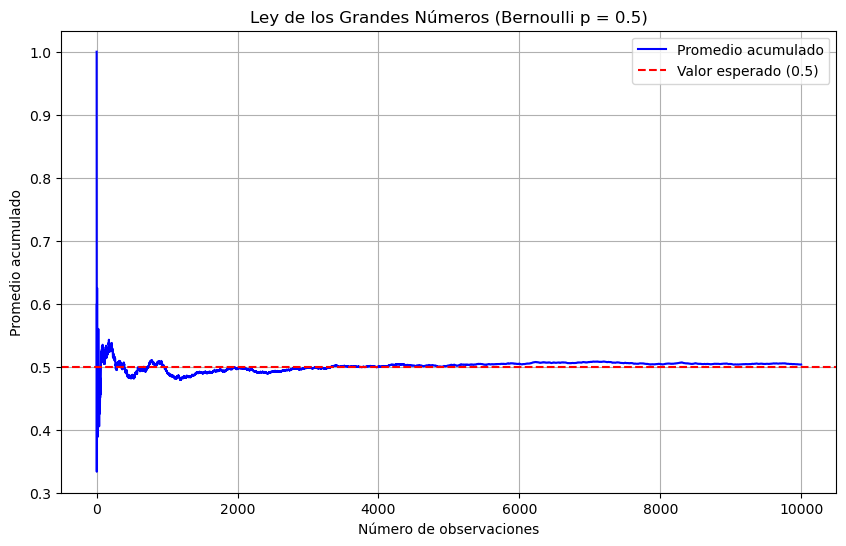

In [200]:
import numpy as np
import matplotlib.pyplot as plt

# Número total de ensayos
n = 10000

# Semilla para reproducibilidad
np.random.seed(123)

# Generar n variables Bernoulli(p=0.5)
muestras = np.random.binomial(n=1, p=0.5, size=n)

# Calcular promedios acumulados
promedios = np.cumsum(muestras) / np.arange(1, n+1)

# Valor esperado teórico
valor_esperado = 0.5

# Graficar la convergencia
plt.figure(figsize=(10, 6))
plt.plot(promedios, label="Promedio acumulado", color='blue')
plt.axhline(valor_esperado, color='red', linestyle='--', label='Valor esperado (0.5)')
plt.title("Ley de los Grandes Números (Bernoulli p = 0.5)")
plt.xlabel("Número de observaciones")
plt.ylabel("Promedio acumulado")
plt.legend()
plt.grid(True)
plt.show()


## Simulación de la LGN

In [152]:
import numpy as np
import pandas as pd #Manejo y manipulacion de datos
import matplotlib.pyplot as plt
import seaborn as sns #Visualizacion de datos

Simualaremos los lanzamientos de un dado y calcularemos la media 

$$ \Omega = \{ 1,2,3,4,5,6, \}$$

La media teórica : $$\mathbb{E}[X] = 3.5$$

In [162]:
np.random.seed(42) # numeros pseudoaletorios sean reproducibles
lanzamientos = np.random.randint(1,7,10000)

In [164]:
media_acum = np.cumsum(lanzamientos) / np.arange(1,10001)
df = pd.DataFrame( {
    'Lanzamiento': np.arange(1,10001),
    'Media Acumulada': media_acum } )

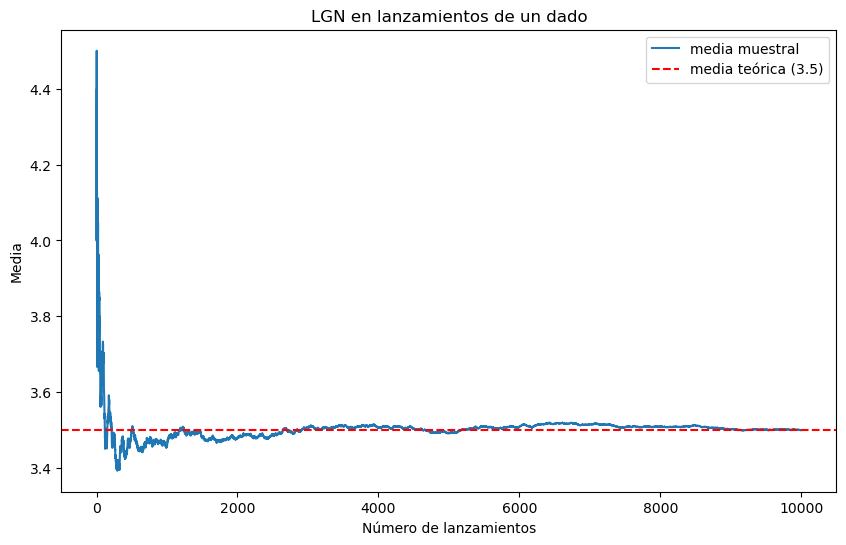

In [166]:
plt.figure(figsize=(10,6))
plt.plot(df['Lanzamiento'], df['Media Acumulada'], label='media muestral')
plt.axhline(3.5, color= 'red', linestyle='--', label='media teórica (3.5)')
plt.xlabel('Número de lanzamientos')
plt.ylabel('Media')
plt.title('LGN en lanzamientos de un dado')
plt.legend()
plt.show()

## Problema de la Ajuga de Bufon

Estimación de pi: 3.14896162990254


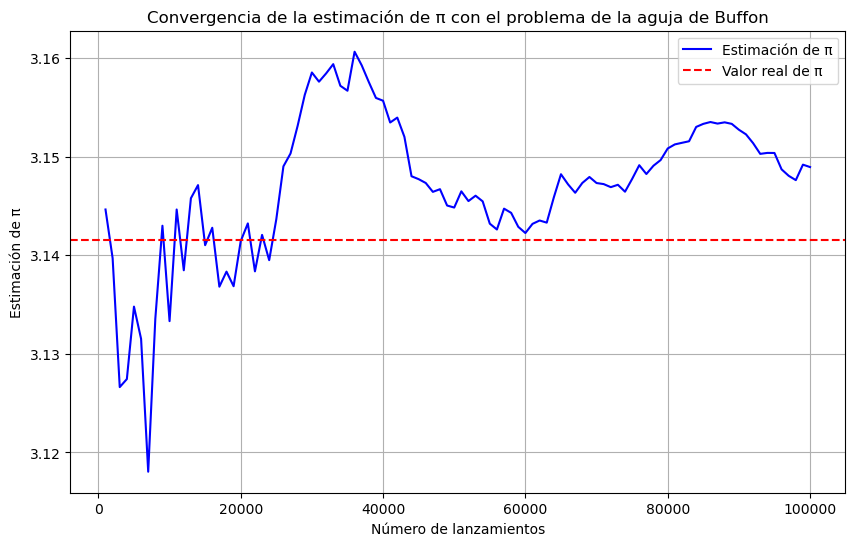

In [159]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del problema
L = 1.0  # Longitud de la aguja
d = 1.0  # Distancia entre las líneas paralelas
num_trials = 100000  # Número total de lanzamientos
step = 1000  # Número de lanzamientos por paso para la estimación de pi

# Listas para almacenar los valores de pi estimados y los lanzamientos
pi_estimates = []
trial_steps = []

# Contador para cuántas agujas cruzan una línea
crossed_lines = 0

# Simulación de lanzamientos de la aguja y estimación de pi en pasos
for trial in range(1, num_trials + 1):
    # Posición del centro de la aguja
    center_position = np.random.uniform(0, d / 2)

    # Ángulo aleatorio entre 0 y pi (ángulo en radianes)
    angle = np.random.uniform(0, np.pi)

    # Distancia desde el centro de la aguja hasta la línea más cercana
    distance_to_nearest_line = L / 2 * np.sin(angle)

    # Verificamos si la aguja cruza una línea
    if center_position <= distance_to_nearest_line:
        crossed_lines += 1

    # Estimación de pi en pasos
    if trial % step == 0 and crossed_lines > 0:
        pi_estimate = (2 * L * trial) / (crossed_lines * d)
        pi_estimates.append(pi_estimate)
        trial_steps.append(trial)

print(f"Estimación de pi: {pi_estimate}")

# Plot de la estimación de pi a lo largo de los lanzamientos
plt.figure(figsize=(10, 6))
plt.plot(trial_steps, pi_estimates, label="Estimación de π", color="blue")
plt.axhline(y=np.pi, color="red", linestyle="--", label="Valor real de π")
plt.xlabel('Número de lanzamientos')
plt.ylabel('Estimación de π')
plt.title('Convergencia de la estimación de π con el problema de la aguja de Buffon')
plt.legend()
plt.grid(True)
plt.show()

# -----------------------------------------
## 2.6 Teorema Central del Límite (TCL)
# ---------------------------------------------


Sea $X_1, X_2, \dots$ una sucesión infinita de variables aleatorias independientes e idénticamente distribuidas, con media $\mu$ y varianza finita $\sigma^2$. Entonces, la función de distribución de la variable aleatoria
$
Z_n = \frac{(X_1 + \cdots + X_n) - n\mu}{\sqrt{n\sigma^2}}
$
tiende a la función de distribución normal estándar cuando $n$ tiende a infinito, es decir,
$
Z_n \xrightarrow{d} \mathcal{N}(0,1),$ 
donde $\xrightarrow{d}$ denota convergencia en distribución. (Rincón,2014)



## Aplicación del TCL

   muestra 1  muestra 2  muestra 3  muestra 4  muestra 5  muestra 6  \
0        591        583        617        610        611        595   
1        612        587        594        613        608        580   
2        615        586        600        608        606        595   
3        593        589        612        612        615        613   
4        587        611        596        621        599        581   

   muestra 7  muestra 8  muestra 9  muestra 10  ...  muestra 41  muestra 42  \
0        600        597        599         602  ...         586         604   
1        582        597        587         625  ...         581         602   
2        613        583        617         617  ...         607         600   
3        596        598        624         610  ...         599         608   
4        589        571        598         612  ...         593         572   

   muestra 43  muestra 44  muestra 45  muestra 46  muestra 47  muestra 48  \
0         615        

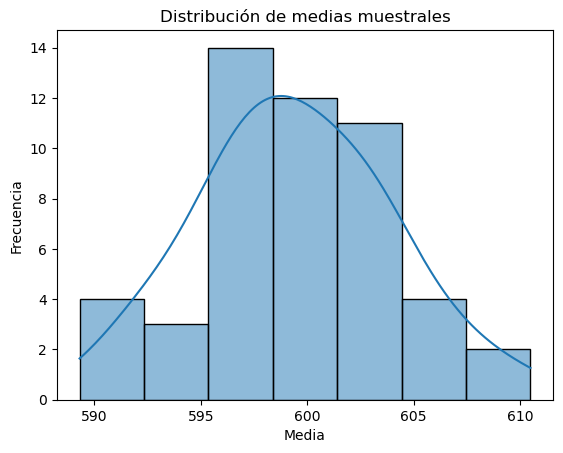

In [177]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear DataFrame con muestras aleatorias binomiales
df = pd.DataFrame()

for i in range(1, 51):
    muestra = np.random.binomial(1000, 0.6, 10)  # 10 observaciones por muestra
    col = f"muestra {i}"
    df[col] = muestra

# Mostrar las primeras 5 filas
print(df.head())

# Calcular el promedio de cada muestra
df_muestra_medias = pd.DataFrame(df.mean(), columns=["Media de la muestra"])

# Visualizar la distribución de las medias muestrales
sns.histplot(df_muestra_medias["Media de la muestra"], kde=True)
plt.title("Distribución de medias muestrales")
plt.xlabel("Media")
plt.ylabel("Frecuencia")
plt.show()
